# Importing the libraries :

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Data Collection :

In [2]:
train_data = pd.read_csv("Flight_train.csv")

In [3]:
pd.set_option("display.max_columns",None)

In [4]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [5]:
train_data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [6]:
train_data.shape

(10683, 11)

In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [8]:
train_data["Duration"].value_counts()

2h 50m     550
1h 30m     386
2h 45m     337
2h 55m     337
2h 35m     329
          ... 
31h 30m      1
30h 25m      1
42h 5m       1
4h 10m       1
47h 40m      1
Name: Duration, Length: 368, dtype: int64

In [9]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [10]:
train_data.dropna(inplace = True)

In [11]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [12]:
train_data.shape

(10682, 11)

In [13]:
train_data.describe(include = "all")

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
count,10682,10682,10682,10682,10682,10682,10682,10682,10682,10682,10682.000000
unique,12,44,5,6,128,222,1343,368,5,10,NaN
top,Jet Airways,18/05/2019,Delhi,Cochin,DEL ? BOM ? COK,18:55,19:00,2h 50m,1 stop,No info,NaN
freq,3849,504,4536,4536,2376,233,423,550,5625,8344,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9087.214567
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4611.548810
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1759.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5277.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8372.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12373.000000


# Exploratory Data Analysis :

1. From the data information we have seen that the column "Date_of_Journey" is "object type data" so we have to convert this into numerical data type so that we can use it for our model prediction properly.

2. For this to convert we need pandas to_datetime to convert this object into datetime data type.

3. Here we use ".dt.day" method for exracting day of that date and also we use ".dt.month" method for extracting month of that date.

In [14]:
train_data["Journey Day"] = pd.to_datetime(train_data.Date_of_Journey,format = "%d/%m/%Y").dt.day

In [15]:
train_data["Journey Month"] = pd.to_datetime(train_data.Date_of_Journey,format = "%d/%m/%Y").dt.month

In [16]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey Day,Journey Month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [17]:
train_data.drop(["Date_of_Journey"],axis = 1,inplace = True)

In [18]:
train_data.columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Dep_Time', 'Arrival_Time',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'Journey Day',
       'Journey Month'],
      dtype='object')

From the data information we have seen that the column "Dep_Time" is "object type data" so we have to convert this into numerical data type so that we can use it for our model prediction properly.

For this to convert we need pandas to_datetime to convert this object into datetime data type.

Here we use ".dt.hour" method for exracting hour of that Dep_Time and also we use ".dt.minute" method for extracting minutes of that Dep_Time.

In [19]:
train_data["Dep_hour"] = pd.to_datetime(train_data.Dep_Time).dt.hour

In [20]:
train_data["Dep_min"] = pd.to_datetime(train_data.Dep_Time).dt.minute

In [21]:
train_data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey Day,Journey Month,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,18,5
4,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,16,50


In [22]:
train_data.drop(["Dep_Time"],axis = 1,inplace = True)

In [23]:
train_data.columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Arrival_Time', 'Duration',
       'Total_Stops', 'Additional_Info', 'Price', 'Journey Day',
       'Journey Month', 'Dep_hour', 'Dep_min'],
      dtype='object')

From the data information we have seen that the column "Arrival_Time" is "object type data" so we have to convert this into numerical data type so that we can use it for our model prediction properly.

For this to convert we need pandas to_datetime to convert this object into datetime data type.

Here we use ".dt.hour" method for exracting hour of that Arrival_Time and also we use ".dt.minute" method for extracting minutes of that Arrival_Time.

In [24]:
train_data["Arrival_hour"] = pd.to_datetime(train_data.Arrival_Time).dt.hour

In [25]:
train_data["Arrival_minutes"] = pd.to_datetime(train_data.Arrival_Time).dt.minute

In [26]:
train_data.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey Day,Journey Month,Dep_hour,Dep_min,Arrival_hour,Arrival_minutes
0,IndiGo,Banglore,New Delhi,BLR ? DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,23:30,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,21:35,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


In [27]:
train_data.drop(["Arrival_Time"],axis = 1,inplace = True)

In [28]:
train_data.columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price', 'Journey Day', 'Journey Month', 'Dep_hour',
       'Dep_min', 'Arrival_hour', 'Arrival_minutes'],
      dtype='object')

1. Here we have to preprocess the column "Duration" to convert it from the object data type into numerical data type, so that we can predict our model properly.

2. For this we are using here "for loop" and "if and else statements" which help us convert categorical values to numerical .


3. We cannot covert this column into numerical column as we have done in the column "Arrival_time" because here we have "h and min" in between so here we use "for loop with if and else statements" .

In [29]:
len("2h 50m".split())

2

In [30]:
# First of all let us convert the column "Duration" into "list" :

duration = list(train_data["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:
        if "h" in duration[i] :
            duration[i] = duration[i].strip() + "0m"
        else:
            duration[i] = "0h" + duration[i]
            
duration_hours = []
duration_mins = []

for i in range(len(duration)) :
    duration_hours.append(int(duration[i].split(sep = "h")[0]))
    duration_mins.append(int(duration[i].split(sep = "m")[0].strip()[-1]))

In [31]:
train_data["Duration_hours"] = duration_hours
train_data["Duration_mins"] = duration_mins

In [32]:
train_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey Day,Journey Month,Dep_hour,Dep_min,Arrival_hour,Arrival_minutes,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR ? DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10,2,0
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15,7,5
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,19h,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30,5,5
4,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35,4,5


In [33]:
train_data.drop(["Duration"],axis = 1,inplace = True)

In [34]:
train_data.columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Total_Stops',
       'Additional_Info', 'Price', 'Journey Day', 'Journey Month', 'Dep_hour',
       'Dep_min', 'Arrival_hour', 'Arrival_minutes', 'Duration_hours',
       'Duration_mins'],
      dtype='object')

# Visualization :

# Univariate Analysis :

### Airline :

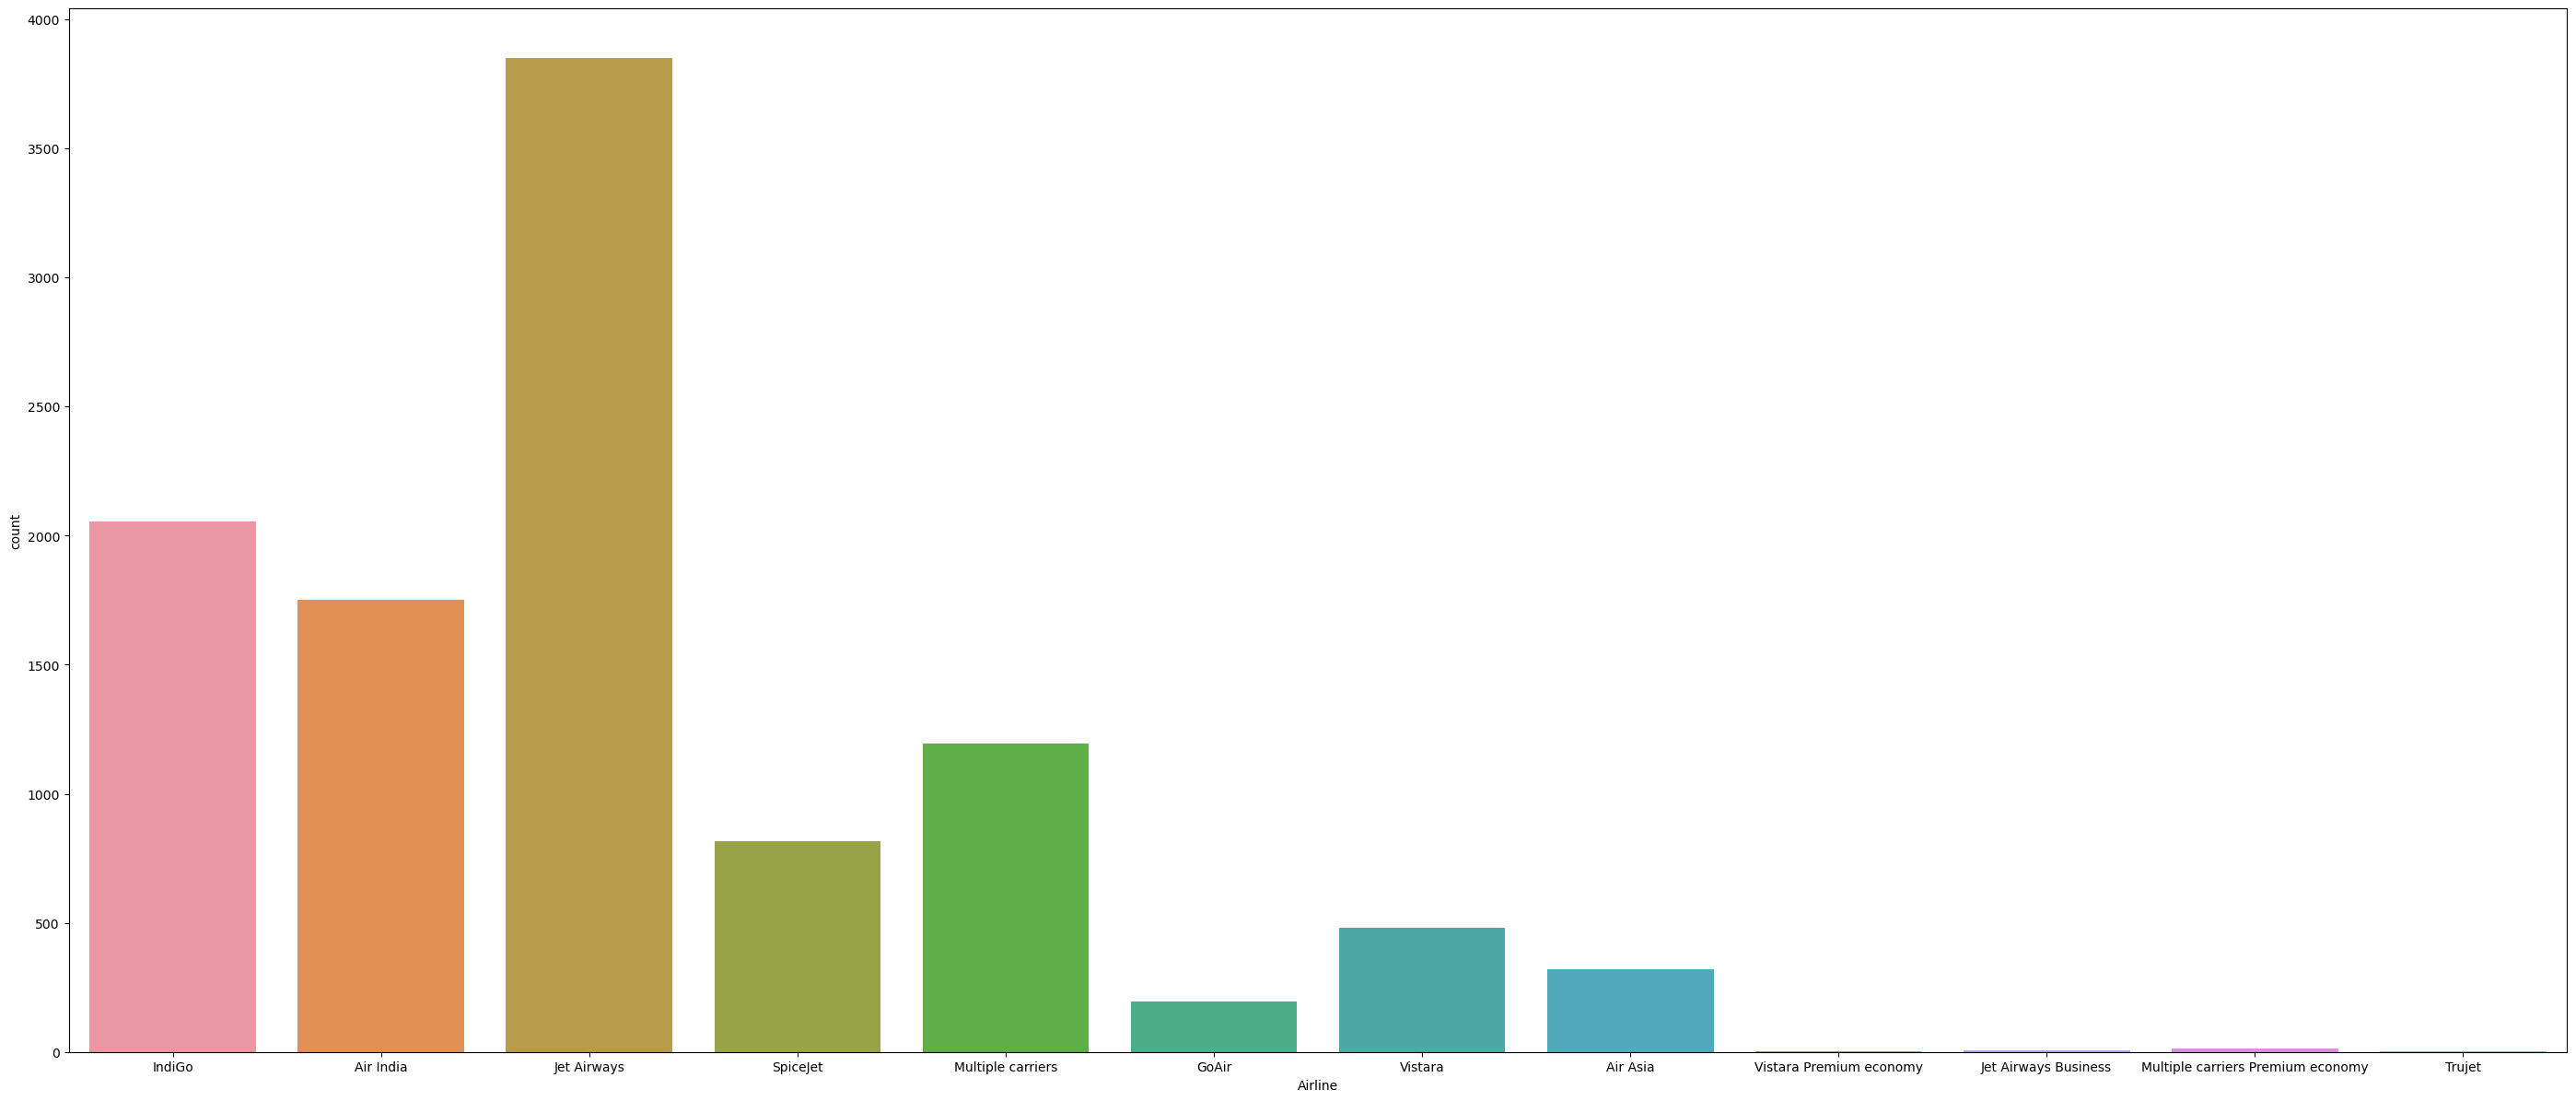

In [35]:
plt.figure(figsize=(35,15),dpi = 100)
sns.countplot(train_data.Airline);

### Source :

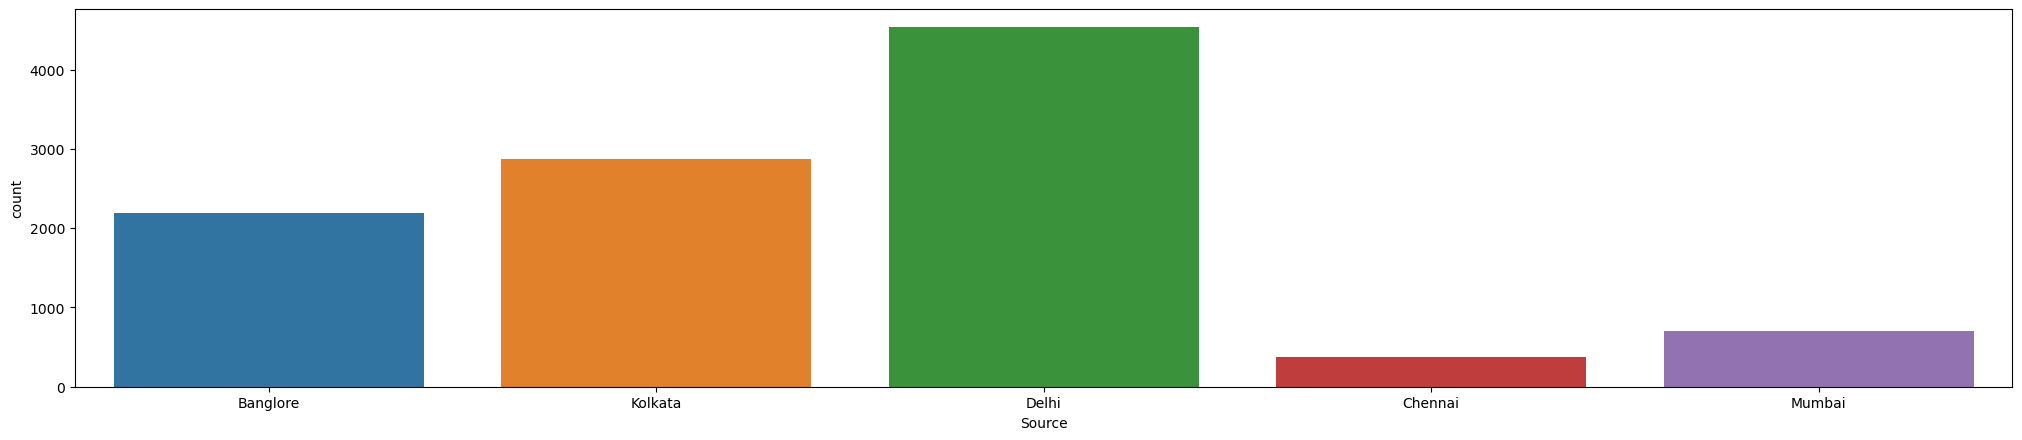

In [36]:
# Source:

plt.figure(figsize=(25,5),dpi = 100)
sns.countplot(train_data.Source);

### Destination :

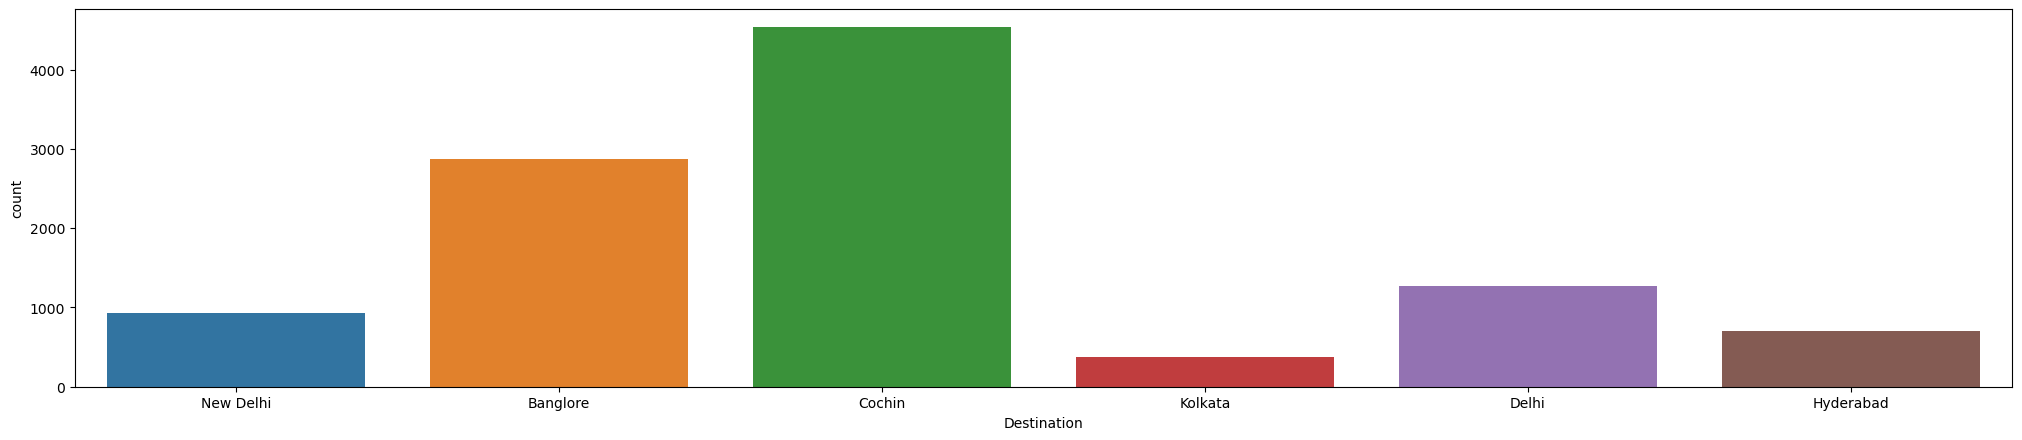

In [37]:
# Destination :

plt.figure(figsize=(25,5),dpi = 100)
sns.countplot(train_data.Destination);

### Route :

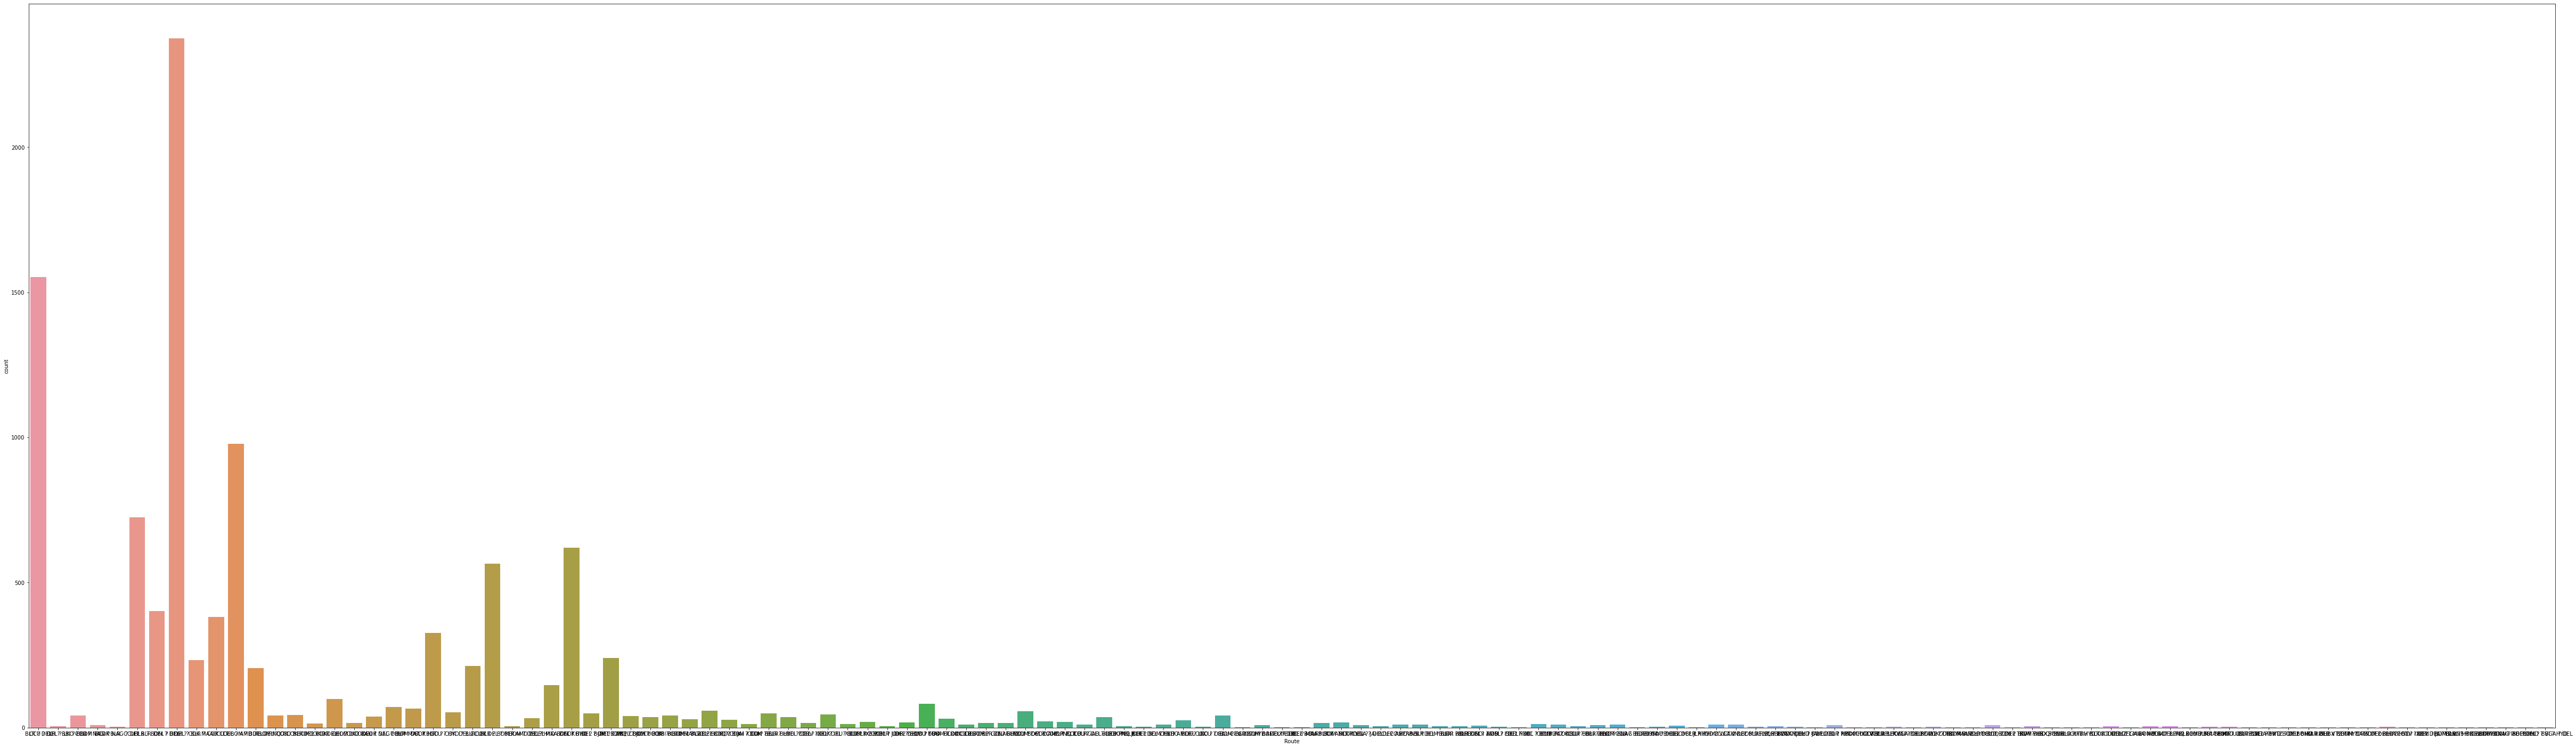

In [38]:
# Route :

plt.figure(figsize=(85,25))
sns.countplot(train_data.Route);

### Total_Stops :

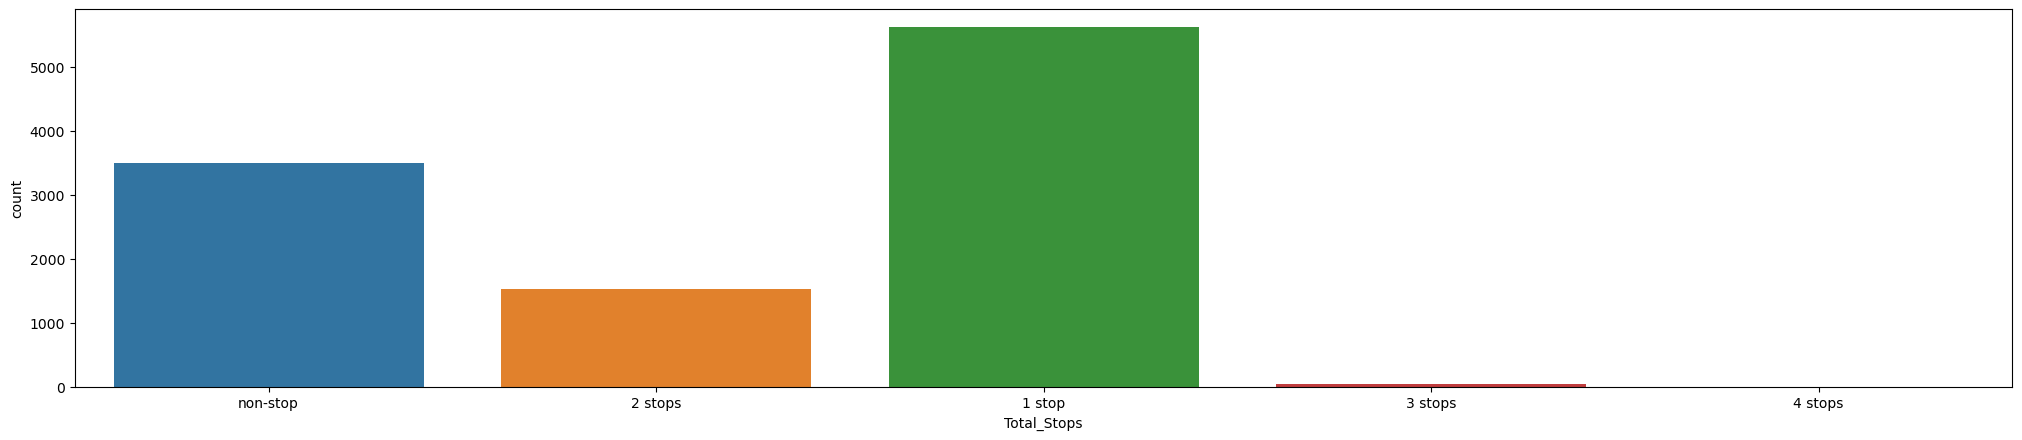

In [39]:
# Total_Stops :

plt.figure(figsize=(25,5),dpi = 100)
sns.countplot(train_data.Total_Stops);

### Additional_Info :

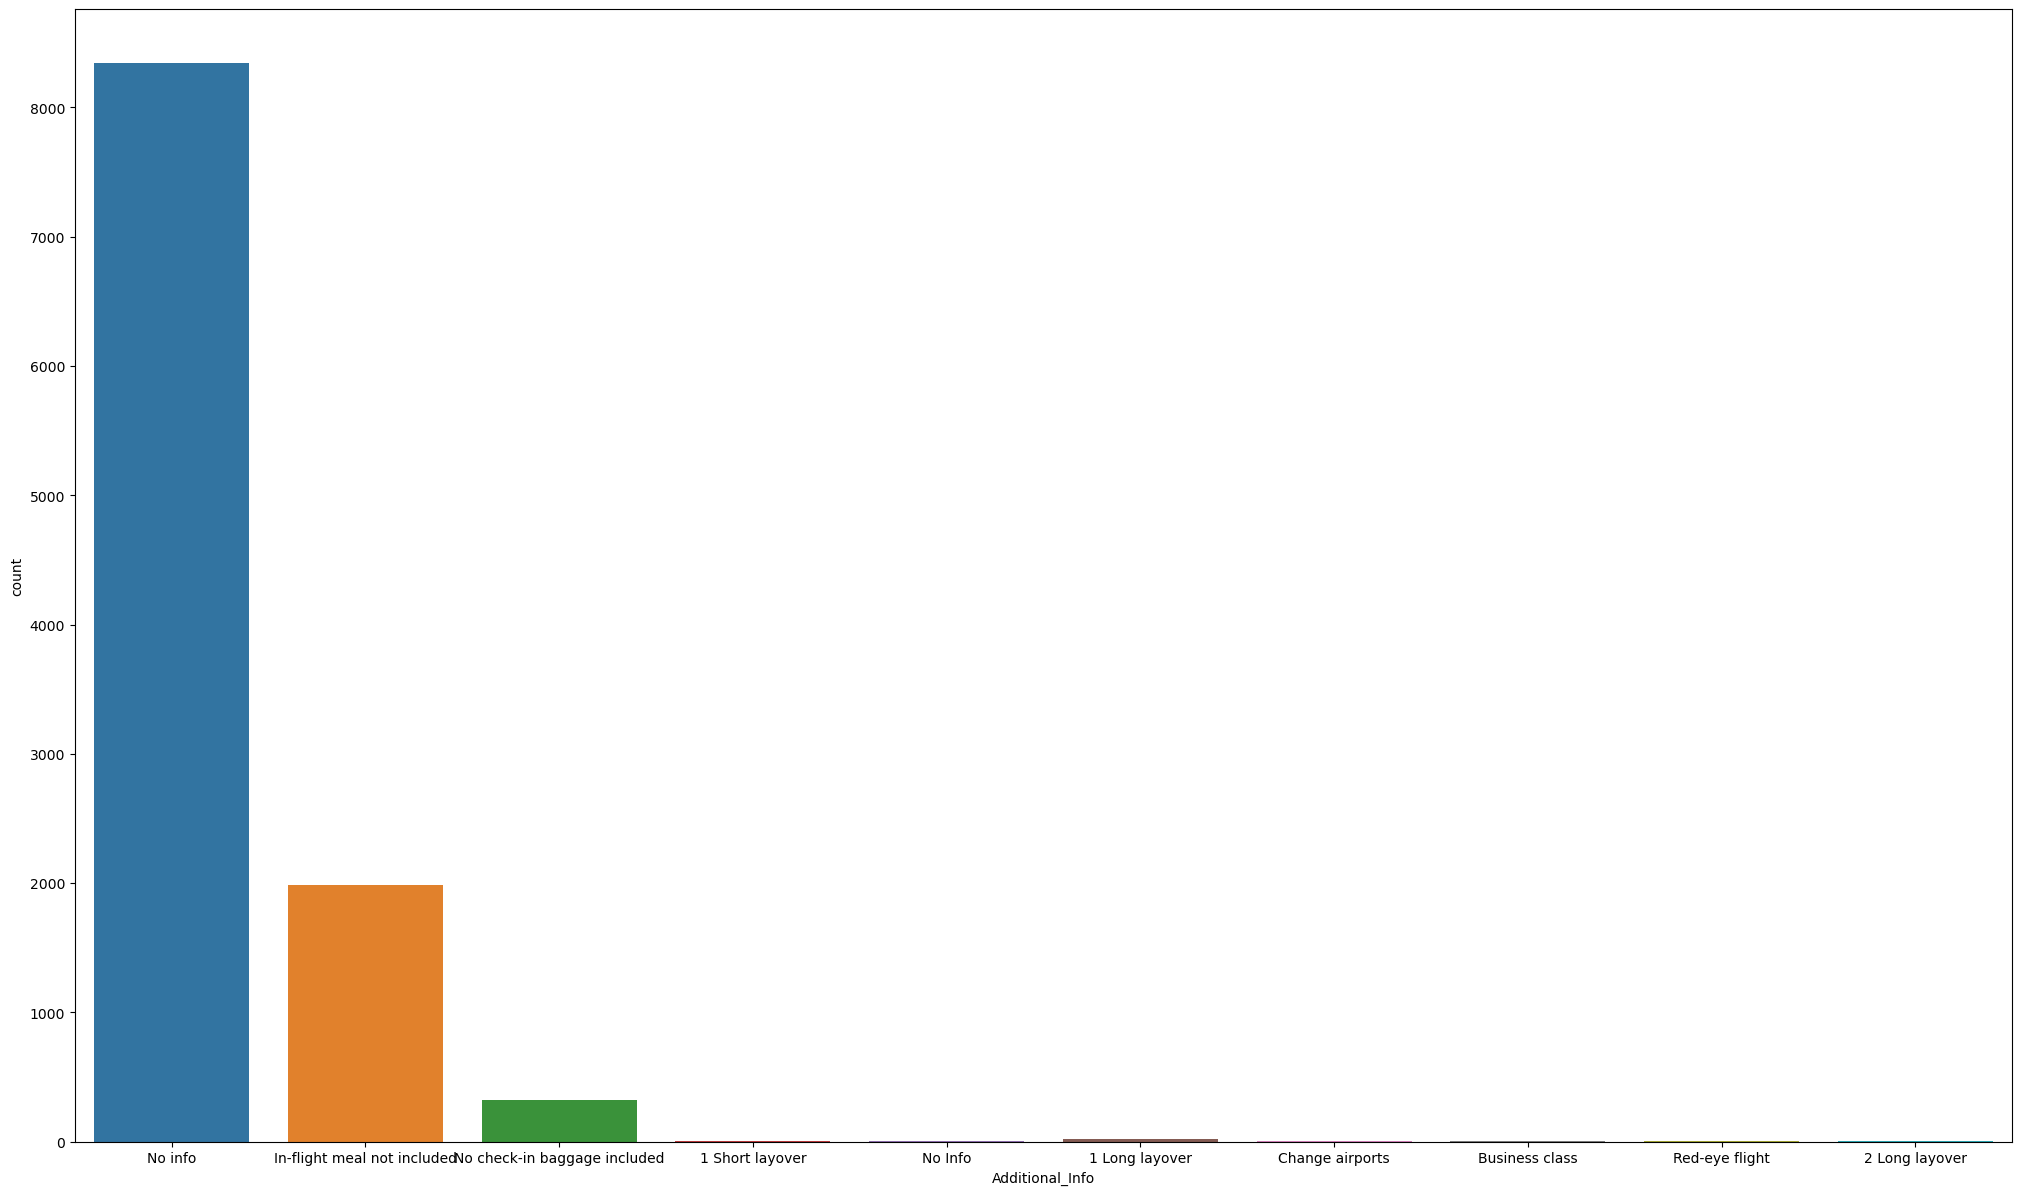

In [40]:
# Additional_Info :

plt.figure(figsize=(25,15),dpi = 100)
sns.countplot(train_data.Additional_Info);


### Price :

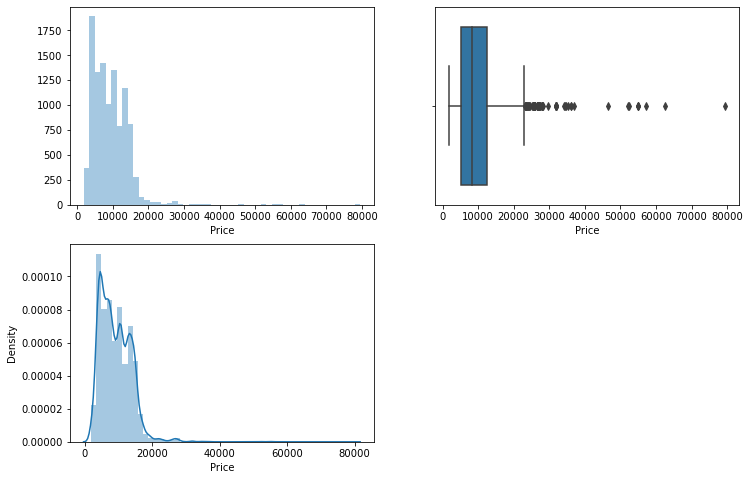

In [41]:
# Price :

plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
sns.distplot(train_data['Price'], kde=False);
plt.subplot(2,2,2)
sns.boxplot(train_data['Price']);
plt.subplot(2,2,3)
sns.distplot(train_data['Price']);

### Journey Day :

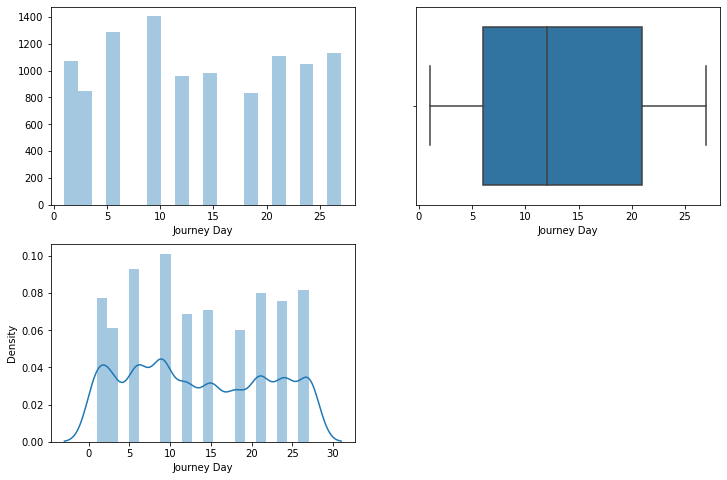

In [42]:
# Journey Day :

plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
sns.distplot(train_data['Journey Day'], kde=False);
plt.subplot(2,2,2)
sns.boxplot(train_data['Journey Day']);
plt.subplot(2,2,3)
sns.distplot(train_data['Journey Day']);

### Journey Month :

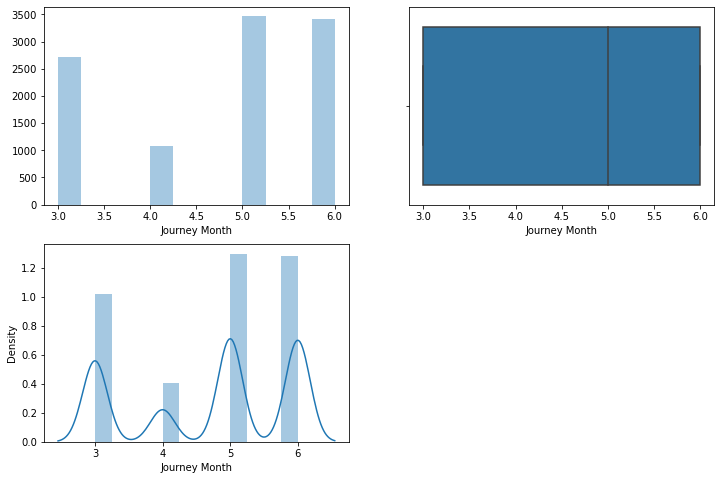

In [43]:
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
sns.distplot(train_data['Journey Month'], kde=False);
plt.subplot(2,2,2)
sns.boxplot(train_data['Journey Month']);
plt.subplot(2,2,3)
sns.distplot(train_data['Journey Month']);


### Dep_hour :

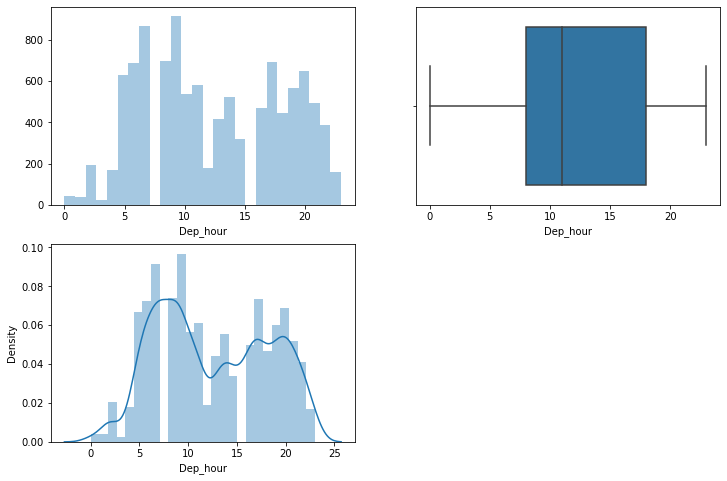

In [44]:
# Dep_hour :

plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
sns.distplot(train_data['Dep_hour'], kde=False);
plt.subplot(2,2,2)
sns.boxplot(train_data['Dep_hour']);
plt.subplot(2,2,3)
sns.distplot(train_data['Dep_hour']);


### Dep_min :

<AxesSubplot:xlabel='Dep_min', ylabel='Density'>

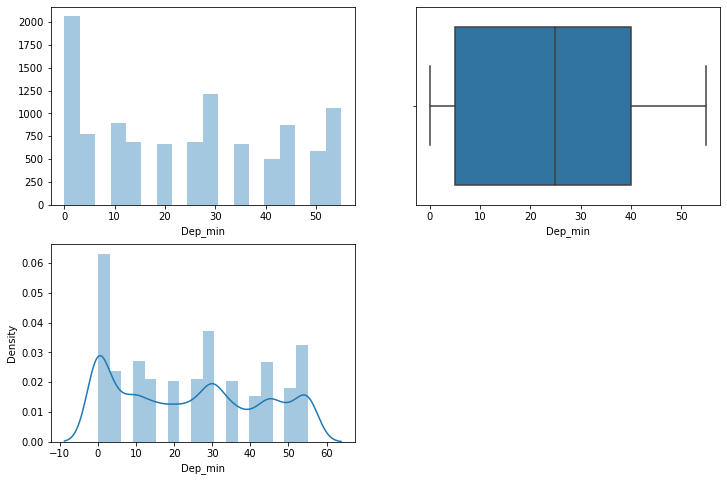

In [45]:
# Dep_min :

plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
sns.distplot(train_data['Dep_min'], kde=False);
plt.subplot(2,2,2)
sns.boxplot(train_data['Dep_min']);
plt.subplot(2,2,3)
sns.distplot(train_data['Dep_min'])

### Arrival_hour :

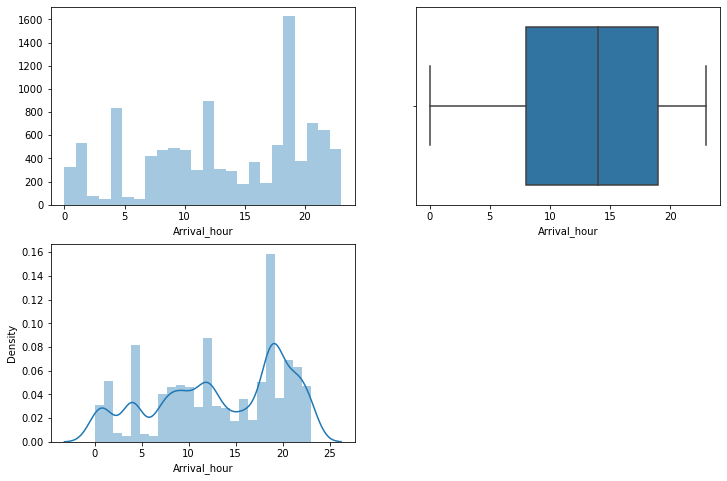

In [46]:
# Arrival_hour :

plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
sns.distplot(train_data['Arrival_hour'], kde=False);
plt.subplot(2,2,2)
sns.boxplot(train_data['Arrival_hour']);
plt.subplot(2,2,3)
sns.distplot(train_data['Arrival_hour']);


### Arrival_minutes :

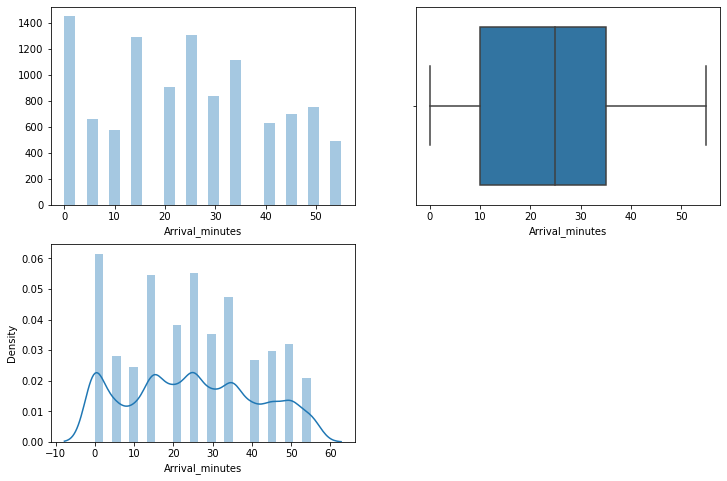

In [47]:
# Arrival_minutes :

plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
sns.distplot(train_data['Arrival_minutes'], kde=False);
plt.subplot(2,2,2)
sns.boxplot(train_data['Arrival_minutes']);
plt.subplot(2,2,3)
sns.distplot(train_data['Arrival_minutes']);

### Duration_hours :

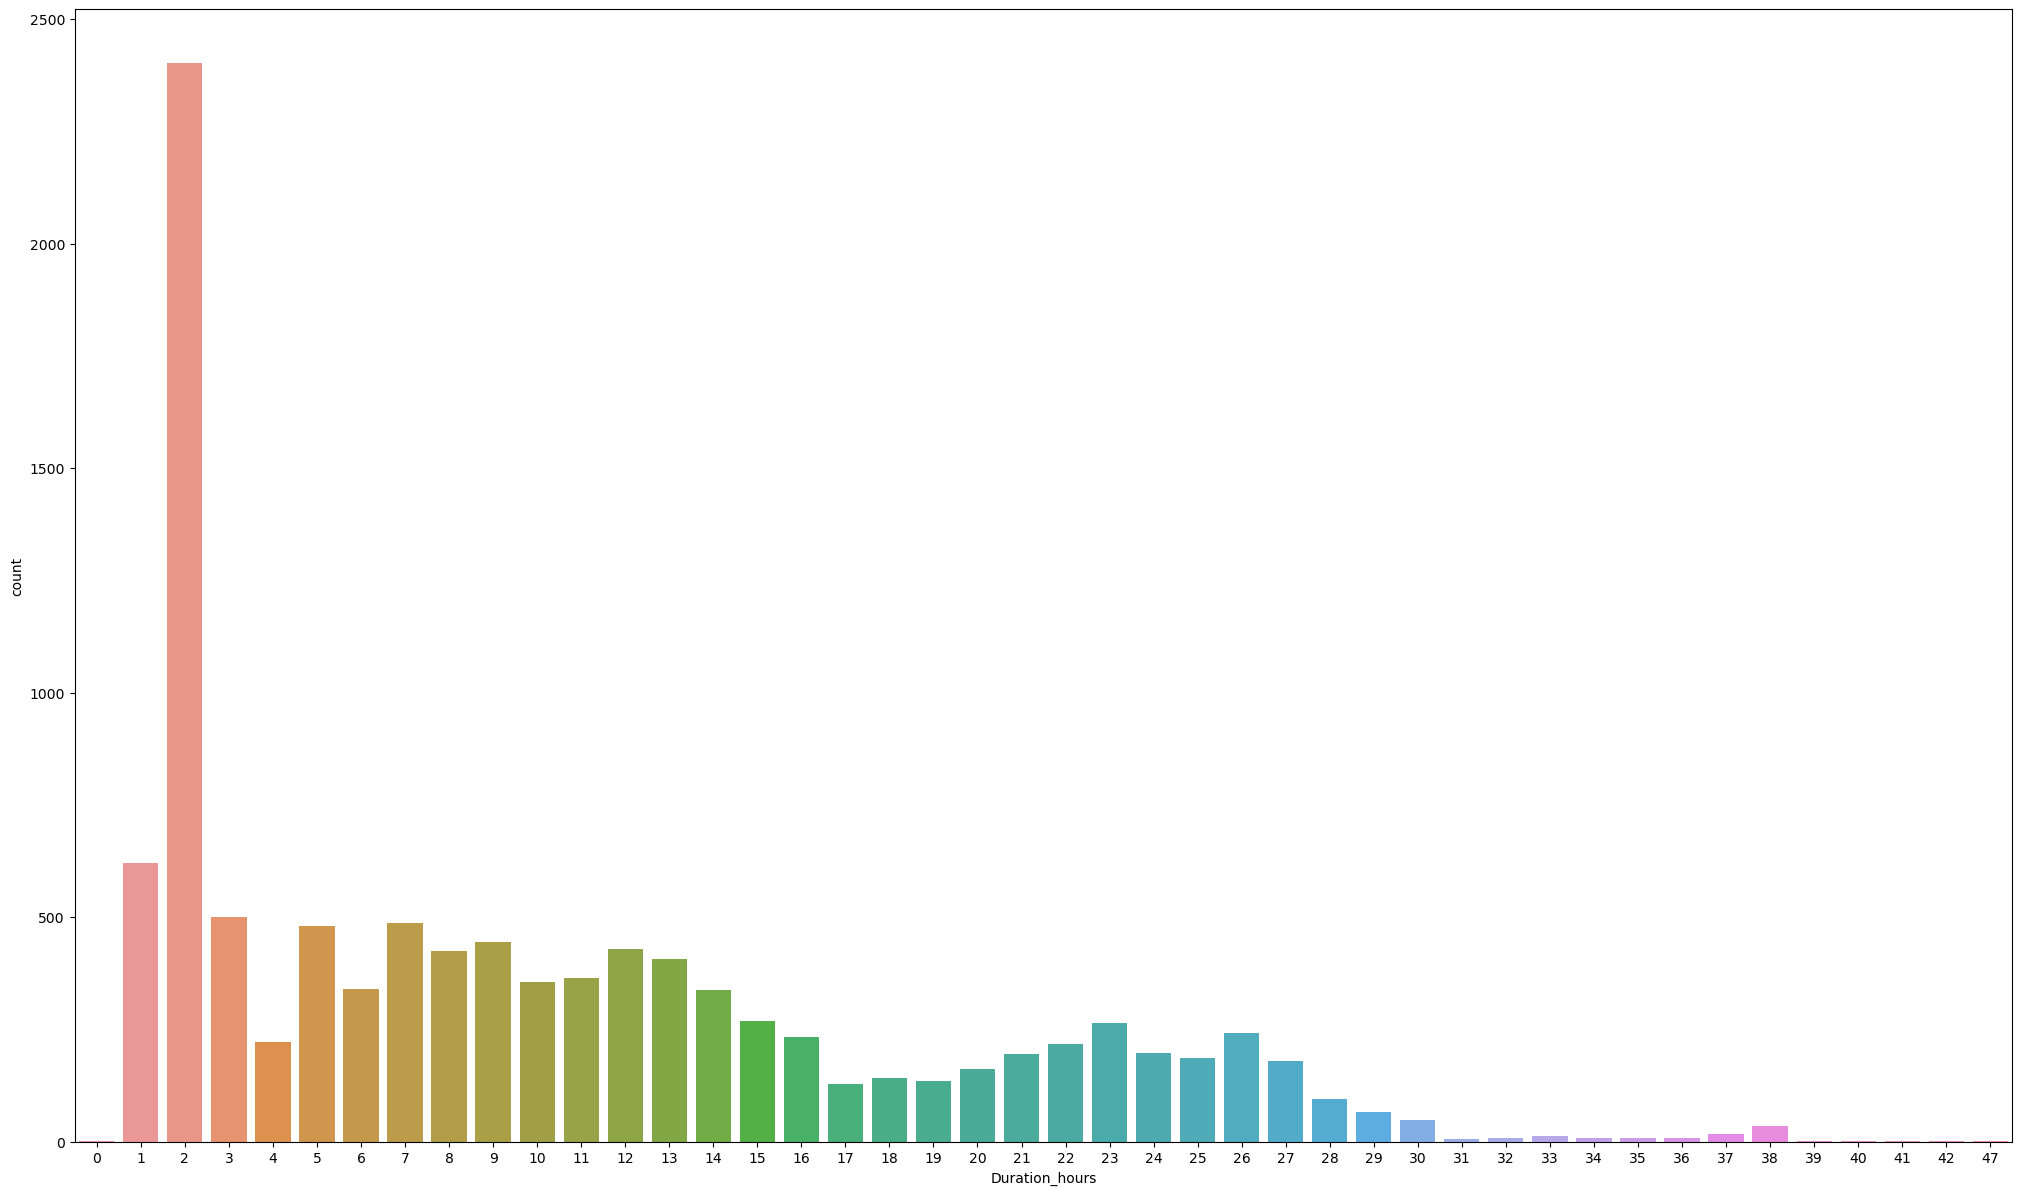

In [48]:
# Duration_hours :

plt.figure(figsize=(25,15),dpi = 100)
sns.countplot(train_data.Duration_hours);


### Duration_mins :

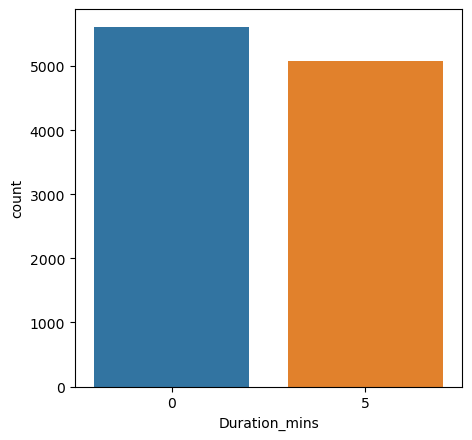

In [49]:
# Duration_mins :

plt.figure(figsize=(5,5),dpi = 100)
sns.countplot(train_data.Duration_mins);


Along with the "Bivariate Analysis" we will also handle the categorical data through "Nominal encoder - One hot encoding" .

## Bivariate Analysis :

### Airline :

<AxesSubplot:xlabel='Price', ylabel='Airline'>

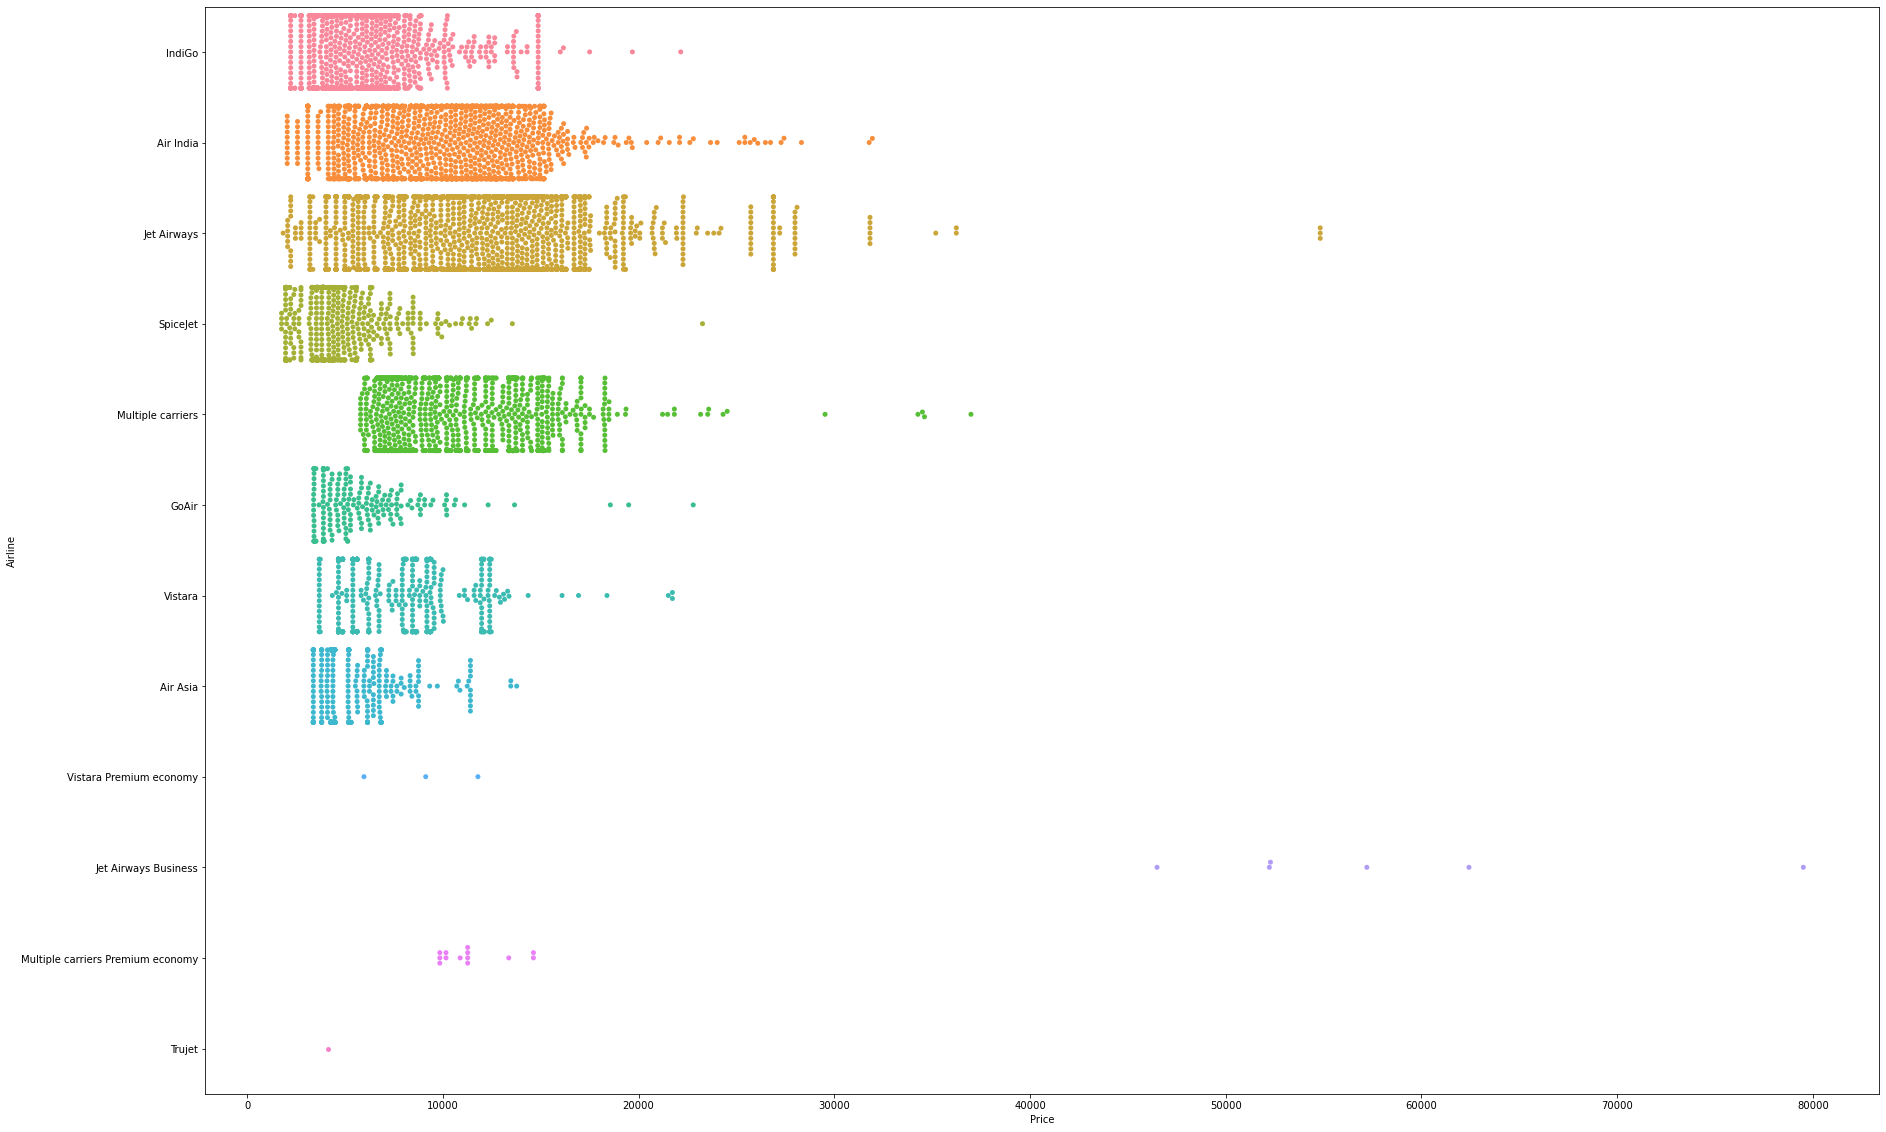

In [50]:
# Airline :

plt.figure(figsize = (30,20))
sns.swarmplot(x = 'Price', y = 'Airline', data = train_data)


Observation : Here we can see that the almost all the companies starts their Airline fare with around less than 5000 but in among all these categories we can see that there is company "Multiple carriers" in which the Airline fare starts with more than 5000 but less than 10000, which means the distribution among all the categories is almost same .

In [51]:
train_data["Airline"].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

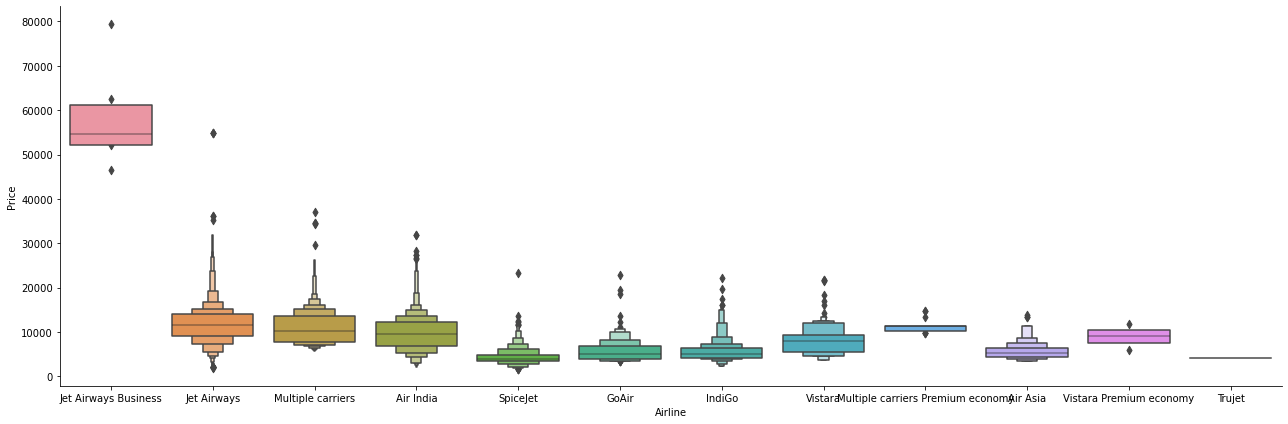

In [52]:
sns.catplot(y = "Price", x = "Airline" , data = train_data.sort_values("Price", ascending = False), kind = "boxen" , height = 6 , aspect = 3)
plt.show()

Observation : Here we can see that the highest price is for the company "Jet Airways Business " remaning companies prices are almost same .

In [53]:
Airline = train_data[["Airline"]]

Airline = pd.get_dummies(Airline , drop_first = True)

Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


Observation : Here we have deleted the original column and the generated columns are presented here . 

### Source :

<AxesSubplot:xlabel='Price', ylabel='Source'>

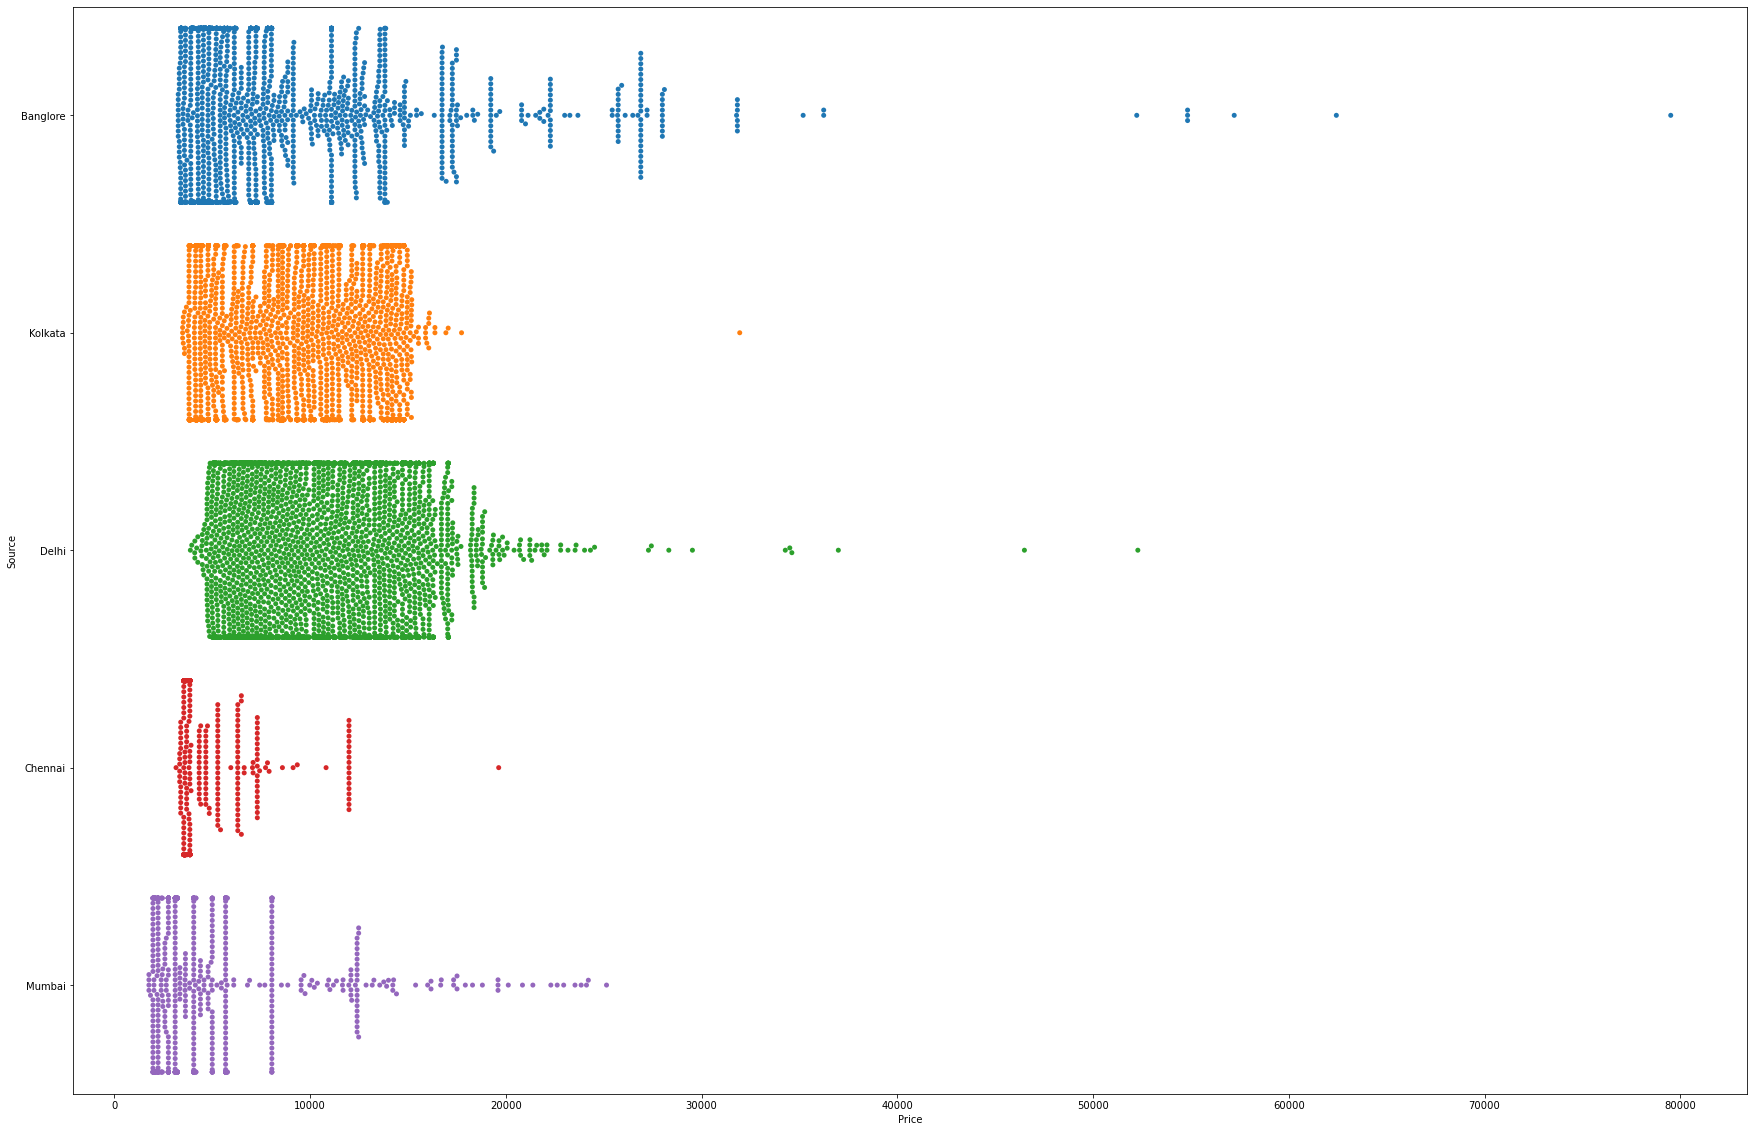

In [54]:
# Source :

plt.figure(figsize = (30,20))
sns.swarmplot(x = 'Price', y = 'Source', data = train_data)


Observation : Here we can see that the states with flight prices range almost same in all the states except in the states "Mumbai" and "Chennai" of that Mumbai has lesser flight prices range when compared with "Chennai" .

In [55]:
train_data["Source"].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

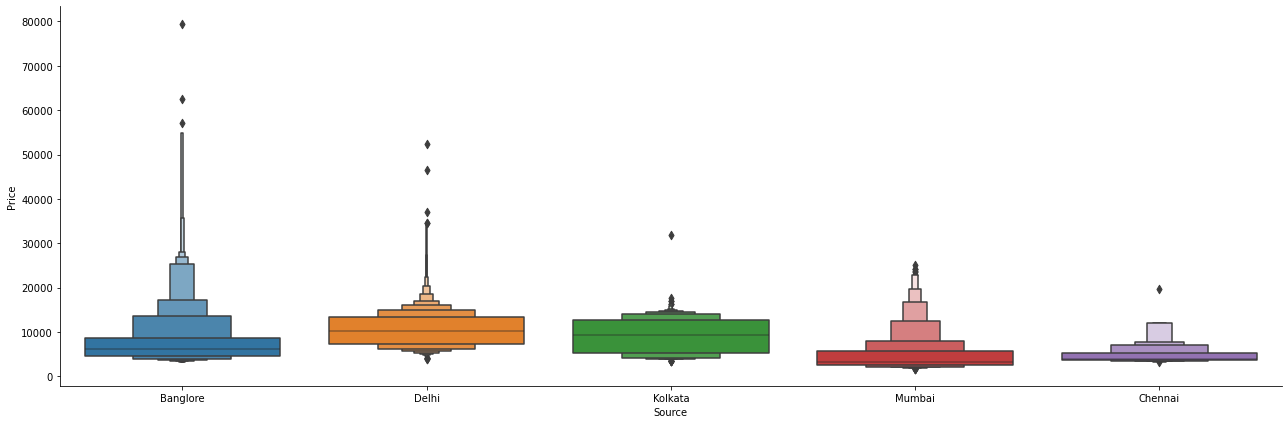

In [56]:
sns.catplot(y = "Price", x = "Source" , data = train_data.sort_values("Price", ascending = False), kind = "boxen" , height = 6 , aspect = 3)
plt.show()

Observation : Here we can see that the column has outliers present in them but among all the other categories "Bangalore" has more number of outliers .

In [57]:
Source = train_data[["Source"]]

Source = pd.get_dummies(Source , drop_first = True)

Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


Observation : here we can see that we have deleted the original column "Source" and we have generated the dummy columns.

### Destination :

<AxesSubplot:xlabel='Price', ylabel='Destination'>

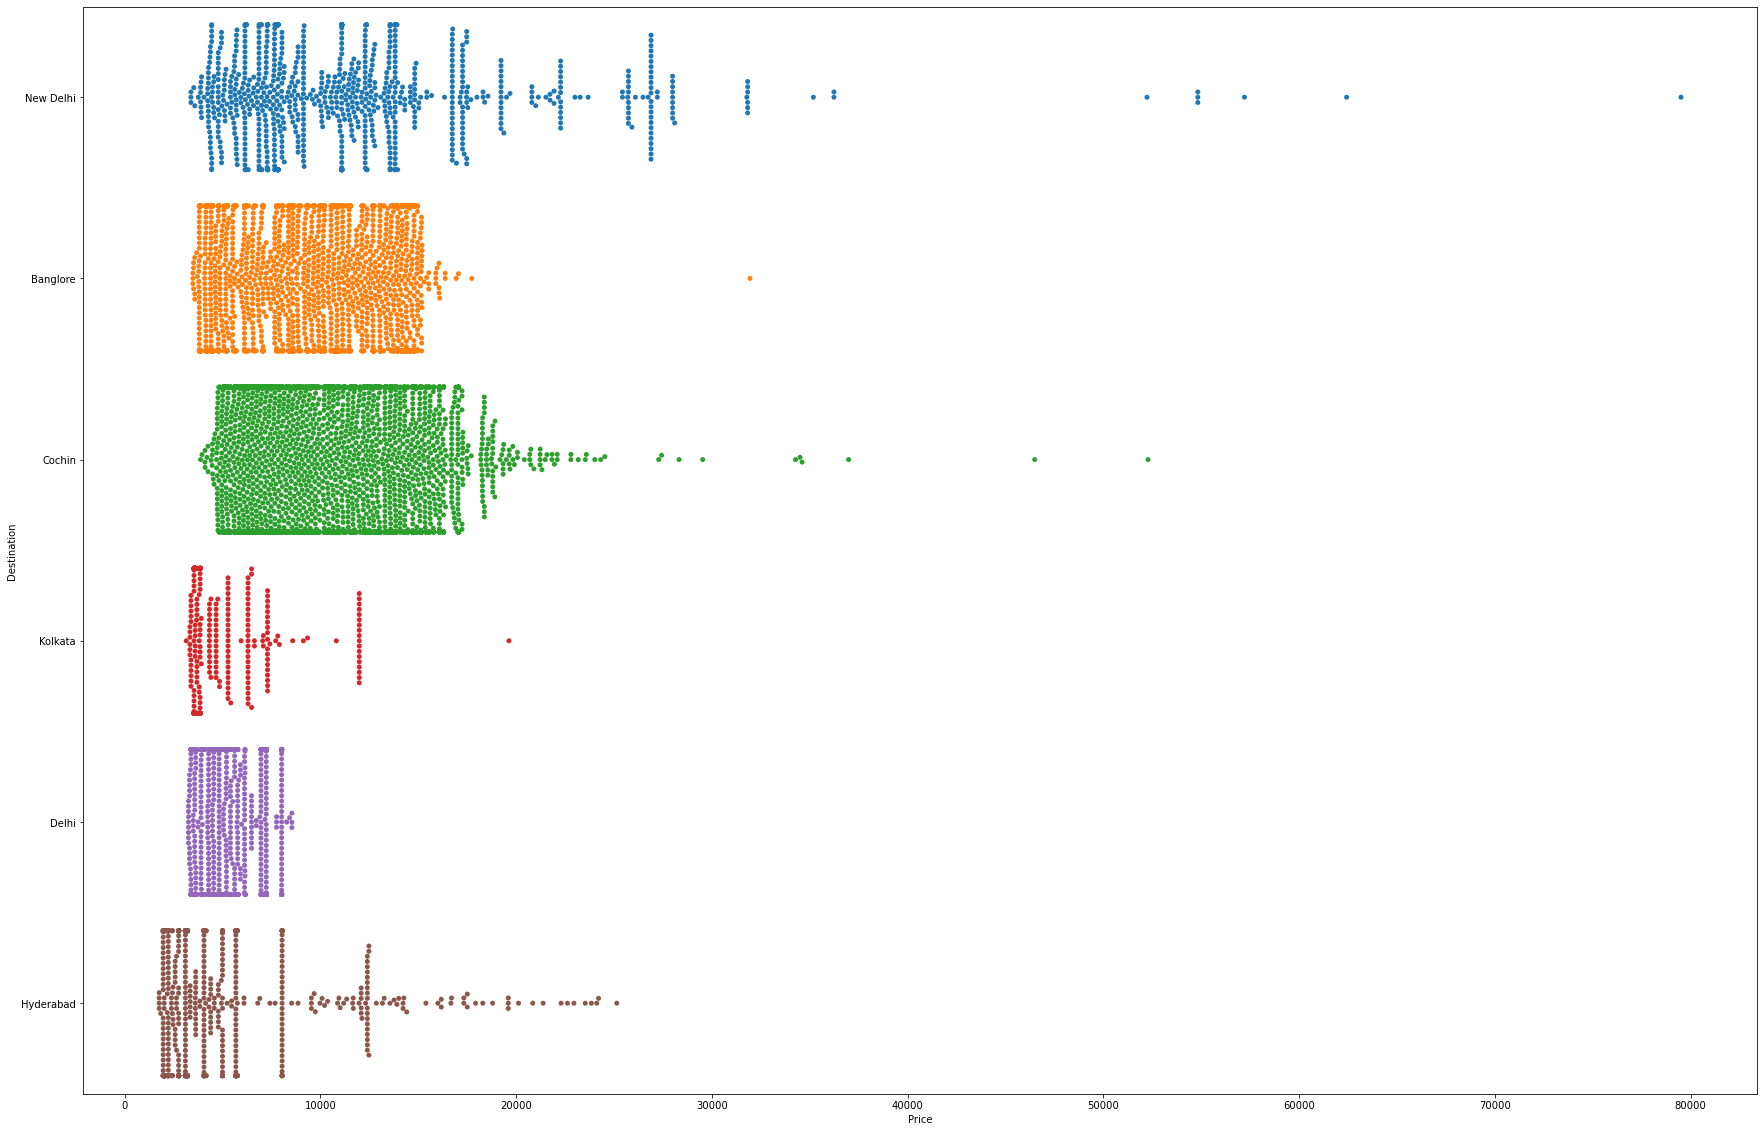

In [58]:
# Destination

plt.figure(figsize = (30,20))
sns.swarmplot(x = 'Price', y = 'Destination', data = train_data)


Observation : 1) Here we can see that the column with Destination which is to "Cochin" , "Bangalore","Newdelhi" have more number of passengers and also has highest price.
              2) Also we can see that the Destination which are with lesser flight prices also with less number of passengers are "Kolkatta" , "Delhi" ,"Hyderabad".

In [59]:
train_data["Destination"].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

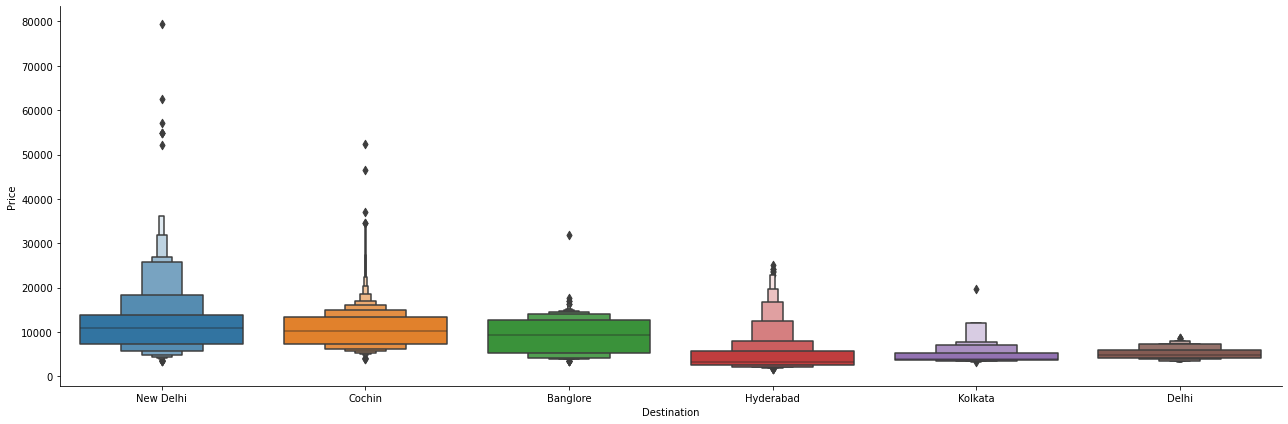

In [60]:
sns.catplot(y = "Price", x = "Destination" , data = train_data.sort_values("Price", ascending = False), kind = "boxen" , height = 6 , aspect = 3)
plt.show()

Observation : Here we can see that the category "New Delhi" has more number of outliers than any other categories of the column .

In [61]:
Destination = train_data[["Destination"]]

Destination = pd.get_dummies(Destination , drop_first = True)

Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


Observation : Here we can see that the original column is deleted and we have generated the new columns which have information of the original column in a required manner

In [62]:
train_data["Route"]

0                    BLR ? DEL
1        CCU ? IXR ? BBI ? BLR
2        DEL ? LKO ? BOM ? COK
3              CCU ? NAG ? BLR
4              BLR ? NAG ? DEL
                 ...          
10678                CCU ? BLR
10679                CCU ? BLR
10680                BLR ? DEL
10681                BLR ? DEL
10682    DEL ? GOI ? BOM ? COK
Name: Route, Length: 10682, dtype: object

In [63]:
train_data["Total_Stops"]

0        non-stop
1         2 stops
2         2 stops
3          1 stop
4          1 stop
           ...   
10678    non-stop
10679    non-stop
10680    non-stop
10681    non-stop
10682     2 stops
Name: Total_Stops, Length: 10682, dtype: object

Observation : Here we can see that the columns are with similar information just the difference is that one column has object type and the other is with numerical, so we can delete any of the column out of the both .

In [64]:
train_data["Additional_Info"]

0        No info
1        No info
2        No info
3        No info
4        No info
          ...   
10678    No info
10679    No info
10680    No info
10681    No info
10682    No info
Name: Additional_Info, Length: 10682, dtype: object

Observation : Here we can see that most of the data present in the column "Additional_Info" is "No-info" and so we can delete this column and proceed with our model building.

In [65]:
train_data.drop(["Route" , "Additional_Info"] , axis = 1 , inplace = True)

In [66]:
train_data.columns

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Price',
       'Journey Day', 'Journey Month', 'Dep_hour', 'Dep_min', 'Arrival_hour',
       'Arrival_minutes', 'Duration_hours', 'Duration_mins'],
      dtype='object')

In [67]:
train_data["Total_Stops"].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [68]:
train_data.replace({"non-stop" : 0 , "1 stop" : 1 , "2 stops" : 2 , "3 stops" : 3 , "4 stops" : 4} , inplace = True)

In [69]:
data_train= pd.concat([train_data, Airline ,Source , Destination] , axis = 1) 

In [70]:
data_train.head()

,Airline,Source,Destination,Total_Stops,Price,Journey Day,Journey Month,Dep_hour,Dep_min,Arrival_hour,Arrival_minutes,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,5,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,5,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [71]:
data_train.drop(["Airline" , "Source" , "Destination"], axis = 1 , inplace = True)

In [72]:
data_train.head()

,Total_Stops,Price,Journey Day,Journey Month,Dep_hour,Dep_min,Arrival_hour,Arrival_minutes,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,22,20,1,10,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,13,15,7,5,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,18,5,23,30,5,5,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [73]:
data_train.shape

(10682, 30)

In [74]:
data_train.columns

Index(['Total_Stops', 'Price', 'Journey Day', 'Journey Month', 'Dep_hour',
       'Dep_min', 'Arrival_hour', 'Arrival_minutes', 'Duration_hours',
       'Duration_mins', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi'],
      dtype='object')

### Total_Stops :

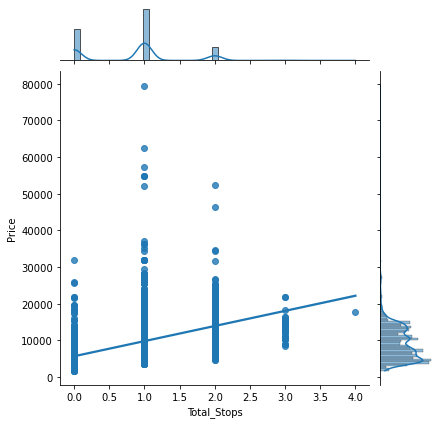

In [75]:
sns.jointplot(data=data_train, x='Total_Stops', y='Price', kind='reg');


Observation : here we can see that the price was increasing with the increase in the number of stops .

### Journey Day :

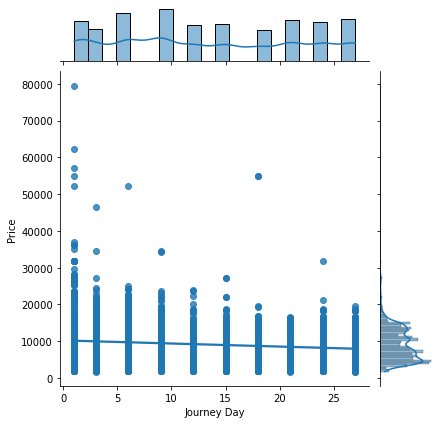

In [76]:
sns.jointplot(data=data_train, x='Journey Day', y='Price', kind='reg');


Observation : Here we can see that as there is increase in the number of days of the journey there is slight decrease in the price .

### Journey Month :

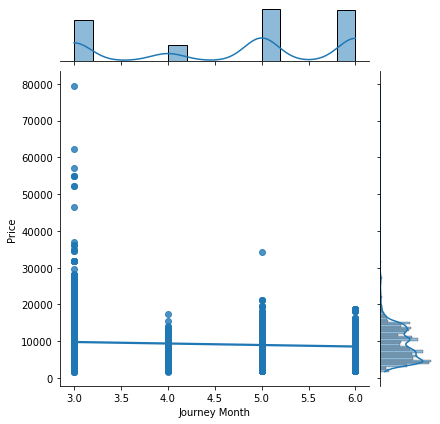

In [77]:
# Journey Month :

sns.jointplot(data=data_train, x='Journey Month', y='Price', kind='reg');

Observation : Here we can see that as the journey month is increasing the price is more or less similar in all the months except in the 3rd month where the price reached to its peak .

### Dep_hour :

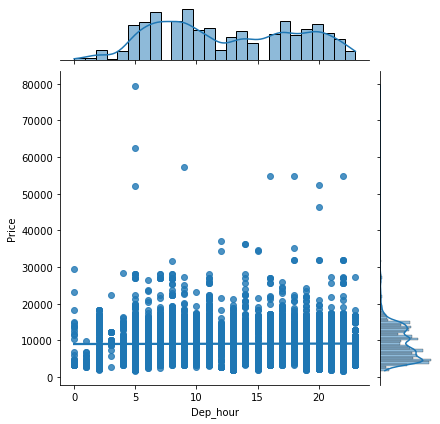

In [78]:
# Dep_hour :

sns.jointplot(data=data_train, x='Dep_hour', y='Price', kind='reg');

Observation : Here we can see that as the departure hour is going on increasing there is more or less no change in the price and so probably at the 5th Departure hour the highest price reached.

### Dep_min : 

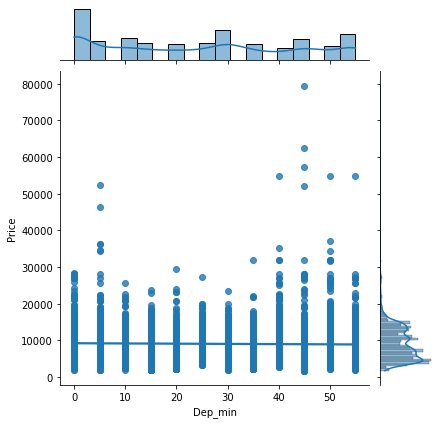

In [79]:
# Dep_min :

sns.jointplot(data=data_train, x='Dep_min', y='Price', kind='reg');

Observation : here we can see that as the departure mins is going on increasing there is more or less no changein the price and the maximum price reached in 45mins .

### Arrival_hour :

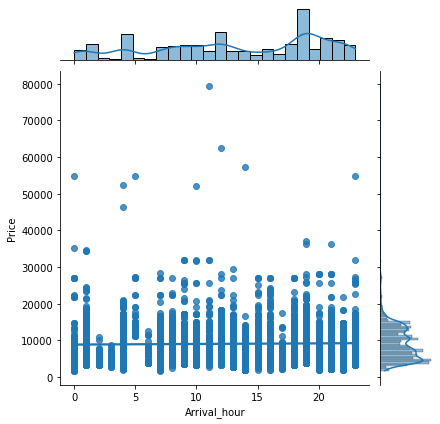

In [80]:
# Arrival_hour :

sns.jointplot(data=data_train, x='Arrival_hour', y='Price', kind='reg');

Observation : Here we can see that as the arrival hour is increasing there is more or less no change in the price but the maximum price reached in the arrival hour reached at the range between 10 - 15 .

### Arrival_minutes :

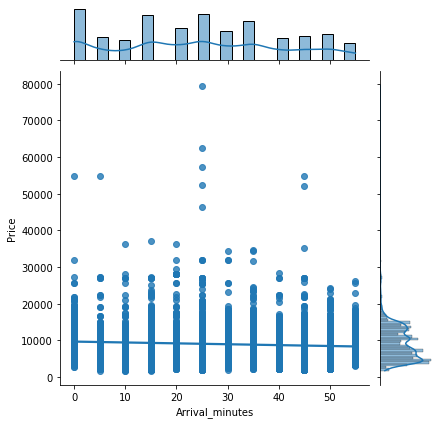

In [81]:
# Arrival_minutes :

sns.jointplot(data=data_train, x='Arrival_minutes', y='Price', kind='reg');

Observation : Here we can see that as there is increase in the arrival minutes there is more or less no change in the price but the maximum price is reached in arrival minutes within a range between 20 - 30 minutes .

### Duration_hours :

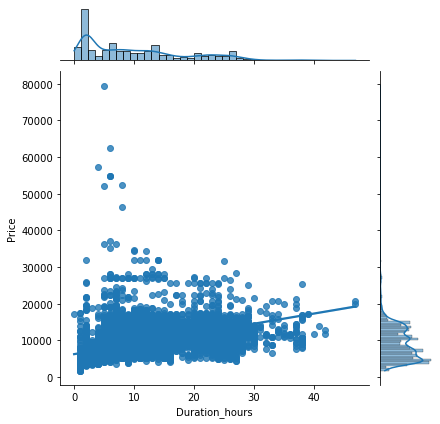

In [82]:
# Duration_hours :

sns.jointplot(data=data_train, x='Duration_hours', y='Price', kind='reg');


Observation : here we can see that as there is increase in the Duration hours the high distribution of price is within the range between 0 - 30 hours and as reached to maximum hours the price is low .

### Duration_mins :

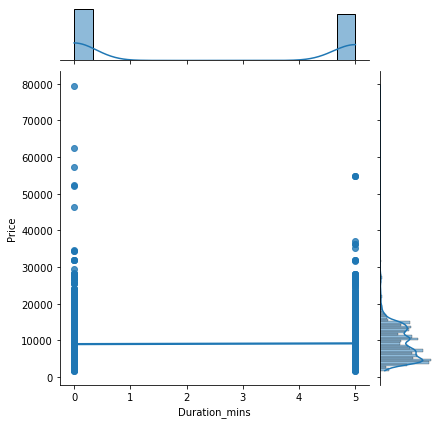

In [83]:
# Duration_mins :

sns.jointplot(data=data_train, x='Duration_mins', y='Price', kind='reg');


Observation : here we can see that as there is increase in the Duration mins the price is more or less same between the range between 1 - 4 mins and the highest price is for the 0 - mins

### Airline_Air India :

<AxesSubplot:xlabel='Airline_Air India', ylabel='Price'>

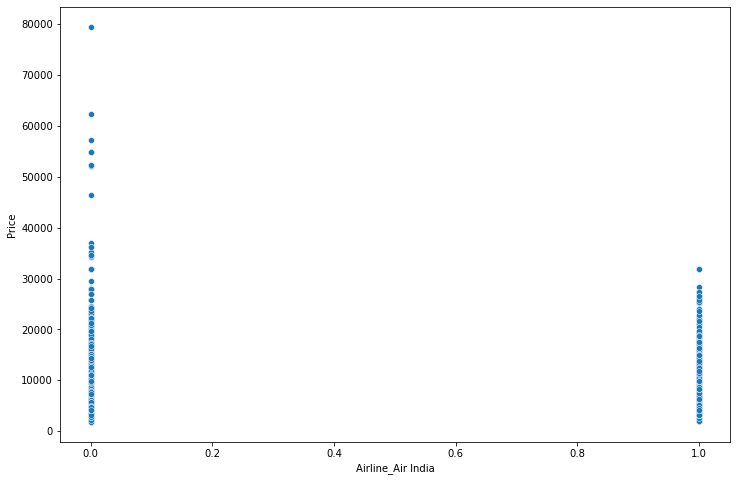

In [84]:
# Airline_Air India :

plt.figure(figsize = (12,8))
sns.scatterplot(x = 'Airline_Air India', y = 'Price',data =data_train,palette = 'cividis_r' )

Observation : Here we can see that the maximum price is for the value "0.0" of the "Airline_Air India".

### Airline_GoAir :

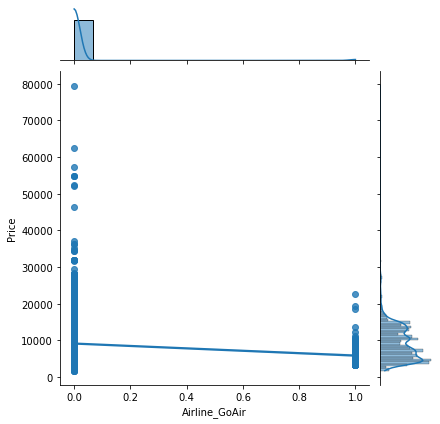

In [85]:
# Airline_GoAir :

sns.jointplot(data=data_train, x='Airline_GoAir', y='Price', kind='reg');


Observation : Here we can see that as the values of "Airline_GoAir" is increasing there is slight decrease in the in the price when it reached to max value of attribute and the highest price is for the category "0.0" of the attribute .

### Airline_IndiGo : 

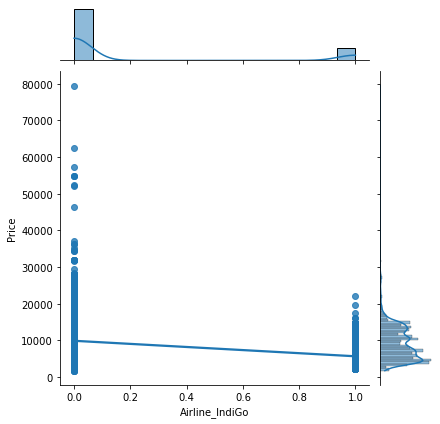

In [86]:
#  Airline_IndiGo :

sns.jointplot(data=data_train, x='Airline_IndiGo', y='Price', kind='reg');

Observation : Here we can see that as the values of "Airline_IndiGo" is increasing there is slight decrease in the in the price when it reached to max value of attribute and the highest price is for the category "0.0" of the attribute .

### Airline_Jet Airways :

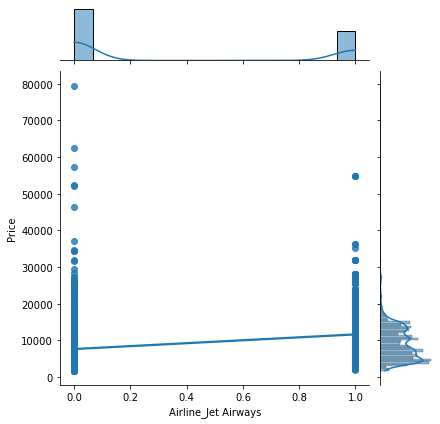

In [87]:
# Airline_Jet Airways :

sns.jointplot(data=data_train, x='Airline_Jet Airways', y='Price', kind='reg');

Observation : Here we can see that as there is increase in the values of "Airline_Jet Airways" there is more or less no change in the prices in the range between 0.2 - 0.8 and the highest price is for the value 0.0 of the attribute .

### Airline_Jet Airways Business : 

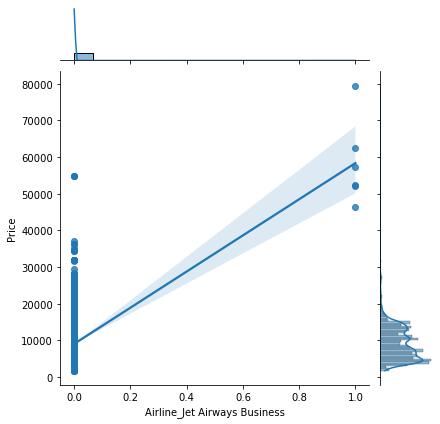

In [88]:
# Airline_Jet Airways Business :

sns.jointplot(data=data_train, x='Airline_Jet Airways Business', y='Price', kind='reg');

Observation : Here we can see that as there is increase in the values of the attribue the price increased and is maximum at the maximumvalue of the attribute but the highest distribution is at 0.0 of the attribute .

### Airline_Multiple carriers :

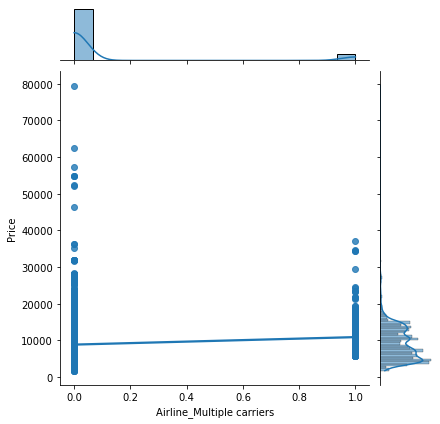

In [89]:
# Airline_Multiple carriers :

sns.jointplot(data=data_train, x='Airline_Multiple carriers', y='Price', kind='reg');

Observation : Here we can see that the highest distribution is for the category 0.0 of the attribute but as there is increase in the value of the attribute more or less there no changes in the attribute . 

### Airline_Multiple carriers Premium economy :

<AxesSubplot:xlabel='Airline_Multiple carriers Premium economy', ylabel='Price'>

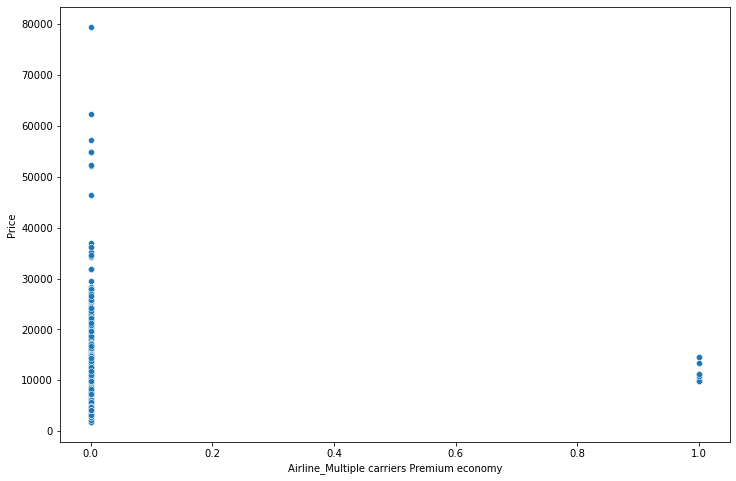

In [90]:
# Airline_Multiple carriers Premium economy :

plt.figure(figsize = (12,8))
sns.scatterplot(x = 'Airline_Multiple carriers Premium economy', y = 'Price',data =data_train,palette = 'cividis_r' )

observation : here we can see that the high distribution is in the value 0.0 of the attribute and the maximum price is for the value 0.0 .

### Airline_SpiceJet :

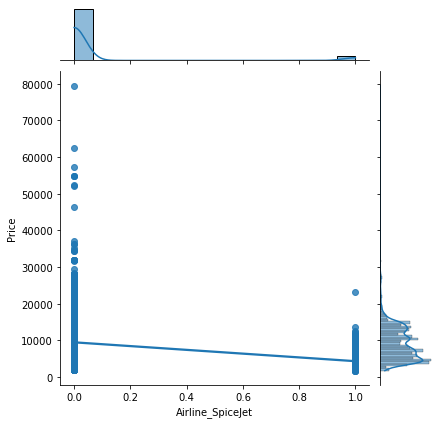

In [91]:
# Airline_SpiceJet :

sns.jointplot(data=data_train, x='Airline_SpiceJet', y='Price', kind='reg');


Observation : here we can see that as there is increase in the values of the attribute there is decrease in the prices and the highest price is for the value 0.0 and also the high distribution id for the same category .

### Airline_Trujet :

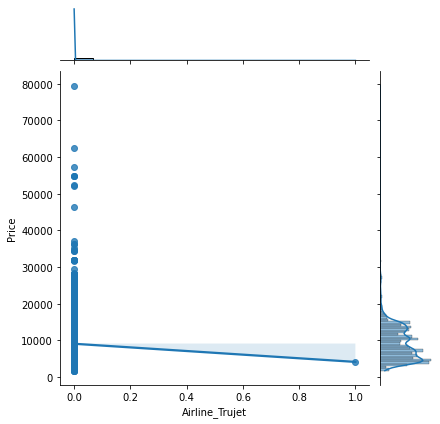

In [92]:
# Airline_Trujet :

sns.jointplot(data=data_train, x='Airline_Trujet', y='Price', kind='reg');


Observation : Here we can see that as there is increase in the values of the attribute there is decrease in the price and the highest price and also distribution is highest for the category 0.0 of the attribute .

### Airline_Vistara :

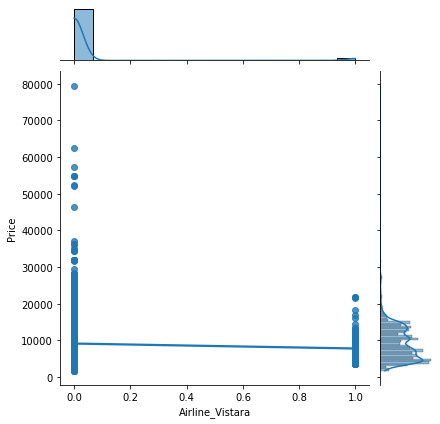

In [93]:
# Airline_Vistara :

sns.jointplot(data=data_train, x='Airline_Vistara', y='Price', kind='reg');


Observation : here we can see that the as the values of the attributes is increasing there is slight decrease in the price and the highest price and distribution is for the category 0.0 

### Airline_Vistara Premium economy :

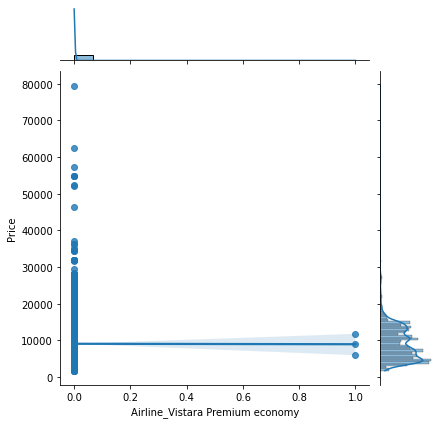

In [94]:
#  Airline_Vistara Premium economy :

sns.jointplot(data=data_train, x='Airline_Vistara Premium economy', y='Price', kind='reg');


Observation : here we can see that as the values of the attributes is increasing there is no change in the price as no distribution in the other attributes except the category 0.0 which is with highest distribition among all and the least distribution is for the max value of the attribute.

### Source_Chennai :

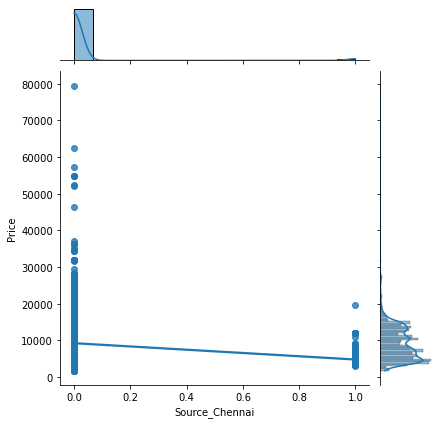

In [95]:
# Source_Chennai :

sns.jointplot(data=data_train, x='Source_Chennai', y='Price', kind='reg');


Observation : here we can see that as the values of the attributes is increasing there is no change in the price as no distribution in the other attributes except the category 0.0 which is with highest distribition among all and the least distribution is for the max value of the attribute.

### Source_Delhi :

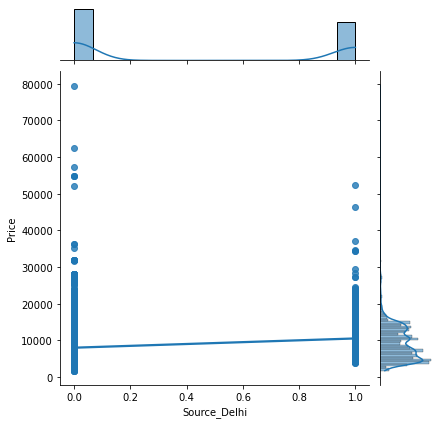

In [96]:
# Source_Delhi :

sns.jointplot(data=data_train, x='Source_Delhi', y='Price', kind='reg');


Observation : Here we can see that as the value of the attribute are increasing there is more or less no change in the price but the distribution is high for the category 0.0 and followed by 1.0

### Source_Kolkata :

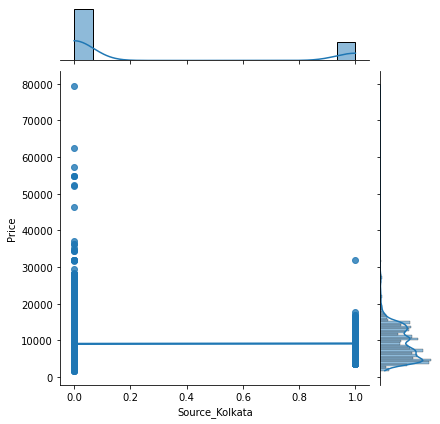

In [97]:
# Source_Kolkata :

sns.jointplot(data=data_train, x='Source_Kolkata', y='Price', kind='reg');


Observation : Here we can see that as the value of the attribute are increasing there is more or less no change in the price but the distribution is high for the category 0.0 and followed by 1.0

### Source_Mumbai :

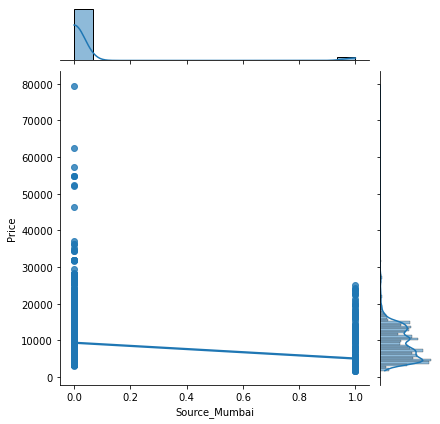

In [98]:
# Source_Mumbai : 

sns.jointplot(data=data_train, x='Source_Mumbai', y='Price', kind='reg');


Observation : Here we can see that as the value of the attribute are increasing there is slight decrease in the price but the distribution is high for the category 0.0 and followed by 1.0

### Destination_Cochin :

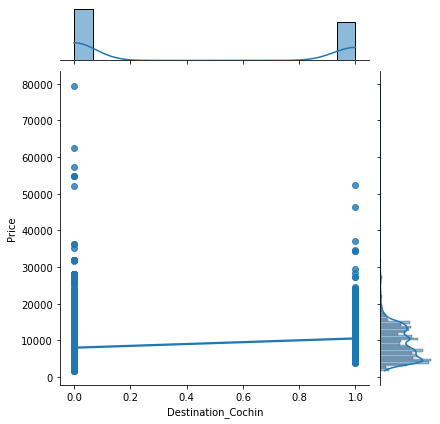

In [99]:
# Destination_Cochin :

sns.jointplot(data=data_train, x='Destination_Cochin', y='Price', kind='reg');


Observation : here we can see that as the values of the attribute is increasing there is slight change in the price but the highest price is for the category 0.0 of the attribute

### Destination_Delhi :

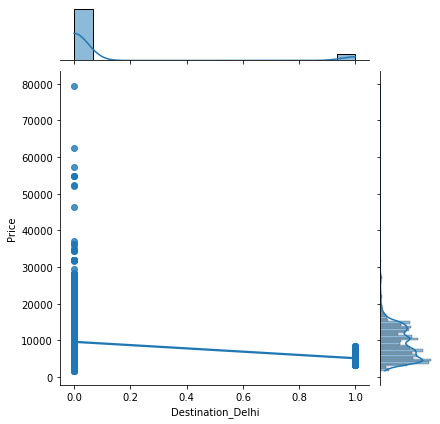

In [100]:
# Destination_Delhi :

sns.jointplot(data=data_train, x='Destination_Delhi', y='Price', kind='reg');



Observation : Here we can see that the highest distribution is for the category 0.0 of the attribute and as the values of the attribute are increasing there is slight decrease in the price and least distribution is for the maximum value of the attribute.

### Destination_Hyderabad :

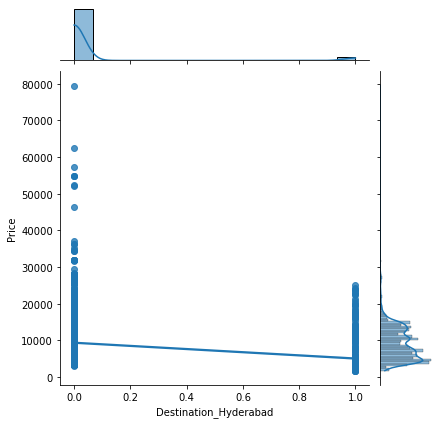

In [101]:
# Destination_Hyderabad :

sns.jointplot(data=data_train, x='Destination_Hyderabad', y='Price', kind='reg');


Observation : Here we can see that the highest distribution is for the category 0.0 of the attribute and as the values of the attribute are increasing there is slight decrease in the price and least distribution is for the maximum value of the attribute.

### Destination_Kolkata :

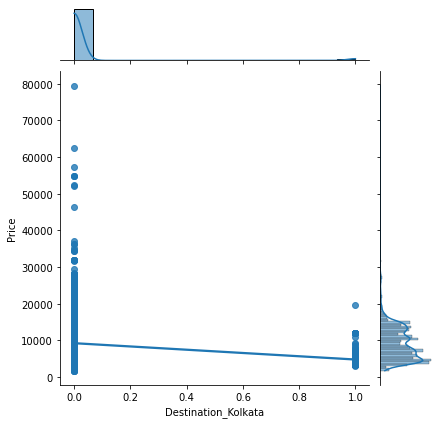

In [102]:
# Destination_Kolkata :

sns.jointplot(data=data_train, x='Destination_Kolkata', y='Price', kind='reg');


Observation : Here we can see that the highest distribution is for the category 0.0 of the attribute and as the values of the attribute are increasing there is slight decrease in the price and least distribution is for the maximum value of the attribute.

### Destination_New Delhi :

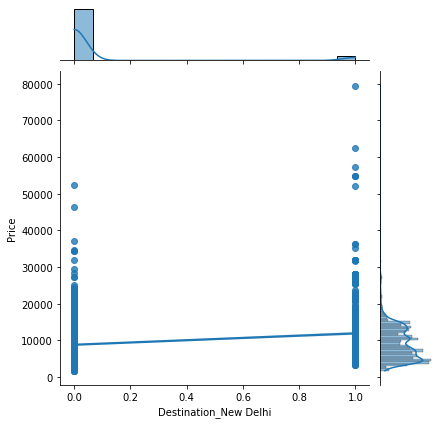

In [103]:
# Destination_New Delhi :

sns.jointplot(data=data_train, x='Destination_New Delhi', y='Price', kind='reg');


Observation : here we can see that as the values of the attribute is increasing there is increase in the price and the distribution is also high for the value 1.0 of the attribute and followed by 0.0

## Correlation :

<AxesSubplot:>

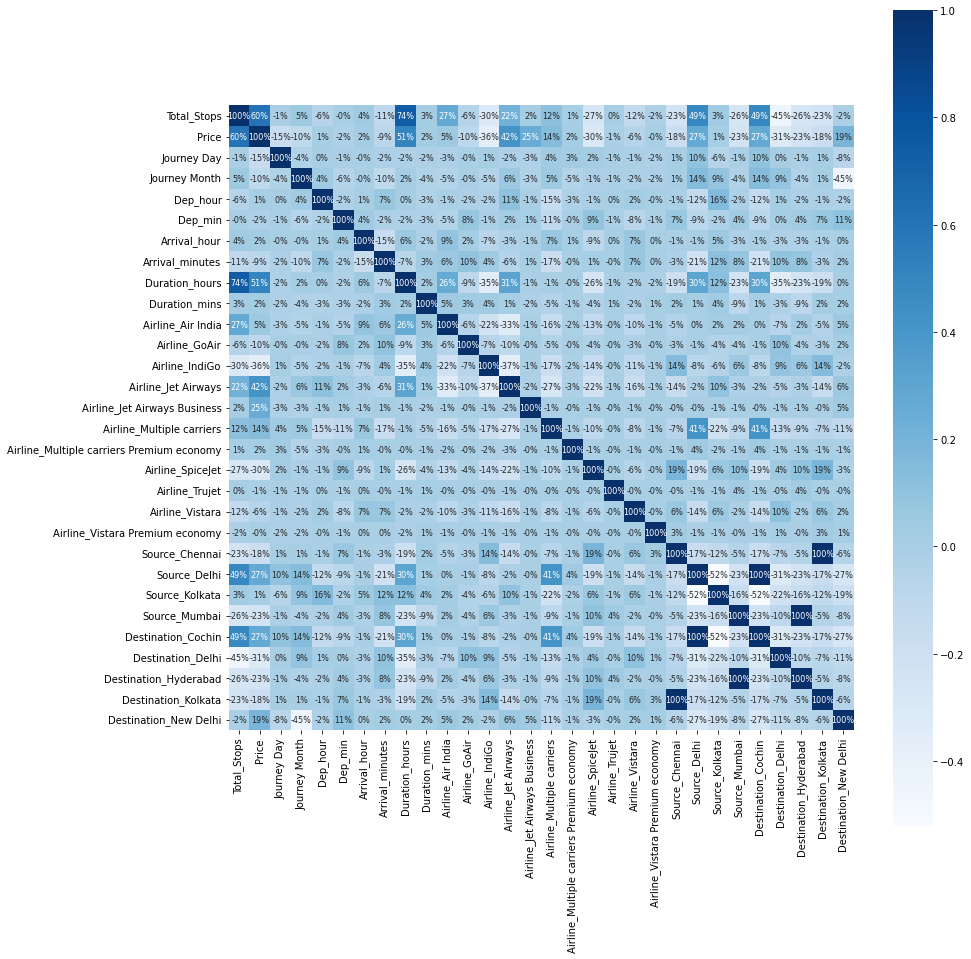

In [104]:
plt.figure(figsize = (14,15))
sns.heatmap(data_train.corr(),cbar = True, square = True, fmt = ".0%", annot = True, annot_kws = {'size': 8}, cmap = 'Blues')

Observation : 1) Here we can see that highest correlation is between the variables "Source_chennai" and "Destination_Kolkatta","Source_Delhi" and "Destination_Cochin" , "Source_Mumbai" and "Destination_Hyderabad" .
    
2) Also we can see that next highest correlation is for the variables "Duration_Hours" and "Total_stops" .

## Checking for the outliers :

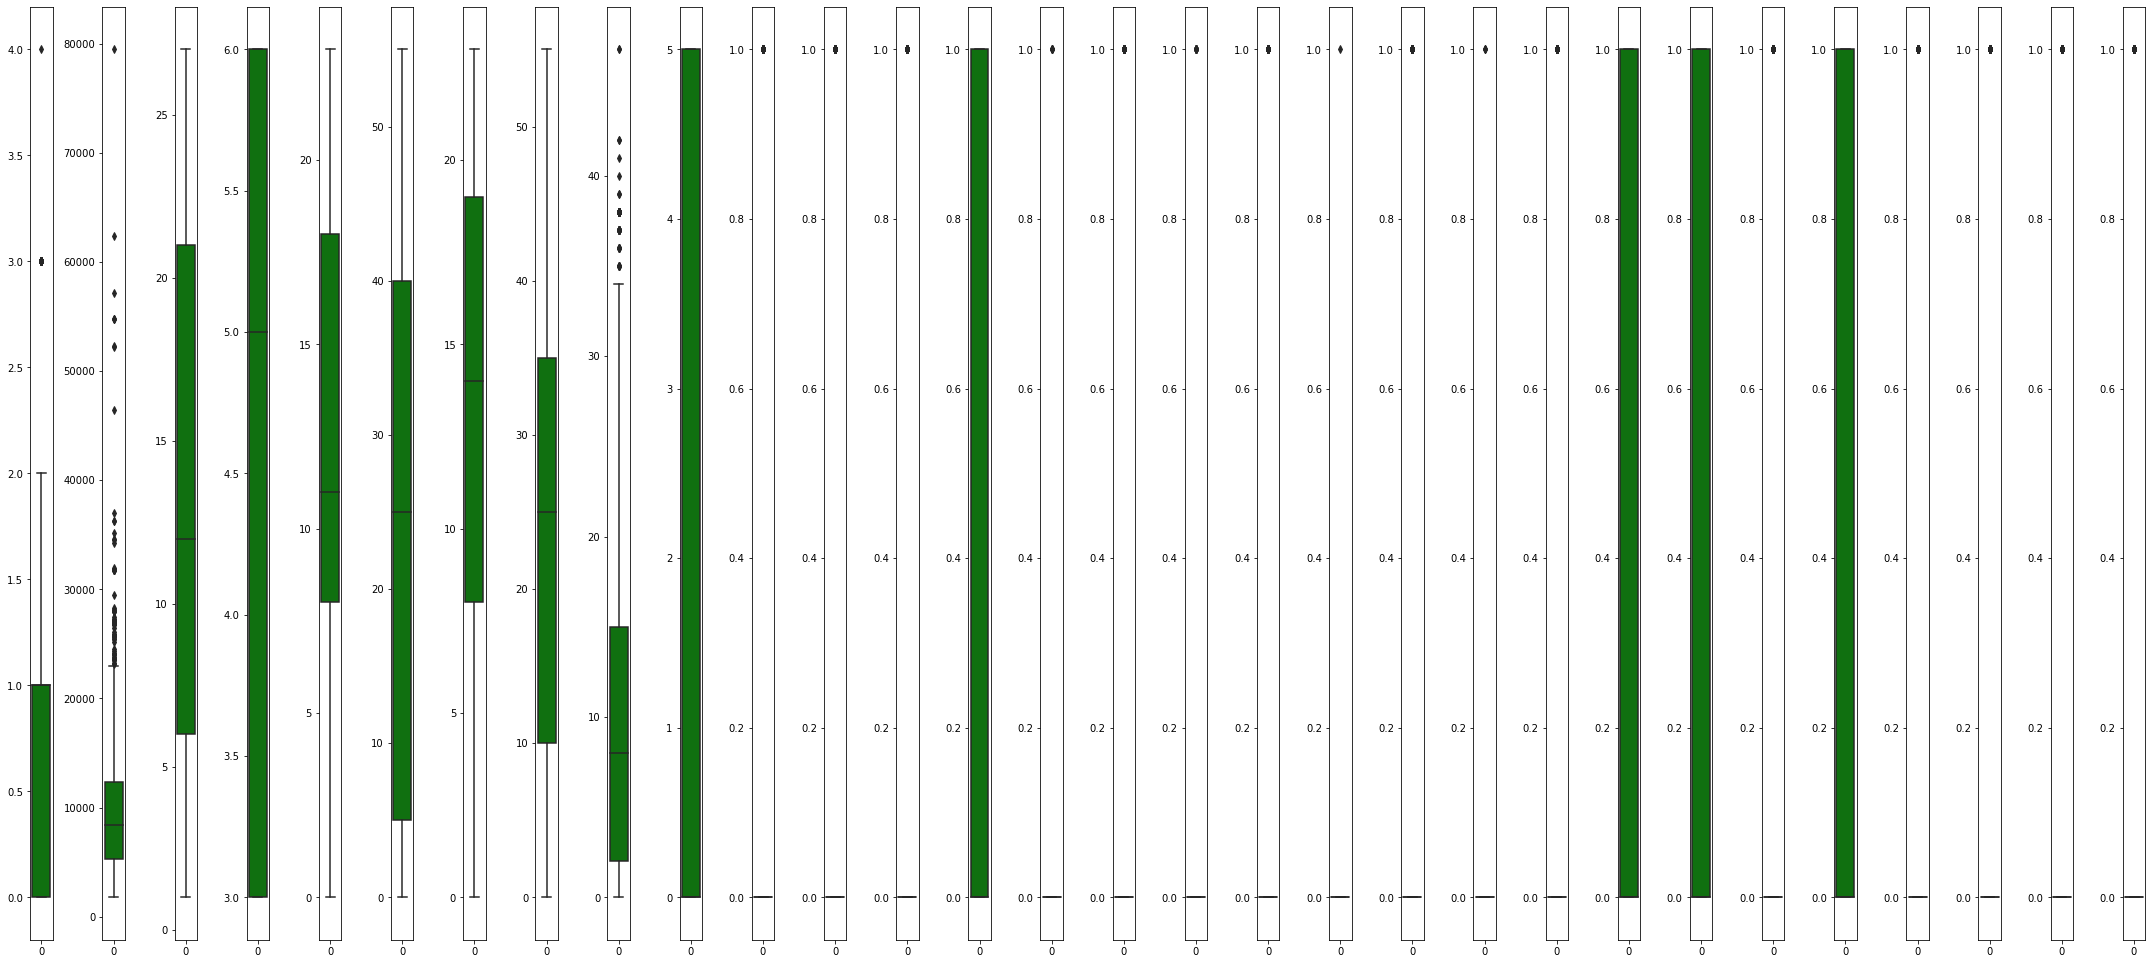

In [105]:
col_list = data_train.columns.values
ncol = 32
nrows = 12
plt.figure(figsize = (ncol,5*ncol))
for i in range (0, len(col_list)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(data = data_train[col_list[i]],color = 'green', orient = 'v')
    plt.tight_layout()

Observation : here we can see that few of the columns have outliers and we have treat them for our good accuracy.

## Removing the outliers through Z - Score Method :

In [106]:
from scipy.stats import zscore
z = np.abs(zscore(data_train))
z.shape

(10682, 30)

In [107]:
threshold = 4
print(np.where(z>4))

(array([   12,    12,    20, ..., 10658, 10659, 10680], dtype=int64), array([21, 28, 11, ..., 19, 19, 19], dtype=int64))


In [108]:
data_train_new = data_train[(z<4).all(axis = 1)]
print(data_train.shape)
print(data_train_new.shape)

(10682, 30)
(9616, 30)


### Loss percentage calculation :

In [109]:
loss_percent = (10682-9616)/10682*100
print(loss_percent)

9.979404605879049


## Skewness :

In [110]:
data_train_new.skew()

Total_Stops                                  0.243486
Price                                        0.582502
Journey Day                                  0.118144
Journey Month                               -0.407719
Dep_hour                                     0.096521
Dep_min                                      0.193263
Arrival_hour                                -0.356858
Arrival_minutes                              0.139069
Duration_hours                               0.781017
Duration_mins                                0.106657
Airline_Air India                            1.674282
Airline_GoAir                                0.000000
Airline_IndiGo                               1.544991
Airline_Jet Airways                          0.417791
Airline_Jet Airways Business                 0.000000
Airline_Multiple carriers                    2.284049
Airline_Multiple carriers Premium economy    0.000000
Airline_SpiceJet                             3.319182
Airline_Trujet              

In [111]:
features = ["Destination_New Delhi","Destination_Hyderabad","Destination_Delhi","Source_Mumbai","Airline_SpiceJet","Airline_Multiple carriers","Airline_IndiGo","Airline_Air India","Source_Kolkata","Duration_hours"]

In [112]:
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')
'''
parameters:
method = 'box-cox' or 'yeo-johnson'
'''

"\nparameters:\nmethod = 'box-cox' or 'yeo-johnson'\n"

In [113]:
data_train_new[features] = scaler.fit_transform(data_train_new[features].values)
data_train_new[features]

,Destination_New Delhi,Destination_Hyderabad,Destination_Delhi,Source_Mumbai,Airline_SpiceJet,Airline_Multiple carriers,Airline_IndiGo,Airline_Air India,Source_Kolkata,Duration_hours
0,3.264316,-0.274325,-0.352726,-0.274325,-0.278033,-0.375985,2.035927,-0.467055,-0.618709,-1.235761
1,-0.306343,-0.274325,-0.352726,-0.274325,-0.278033,-0.375985,-0.491177,2.141076,1.616268,-0.155963
2,-0.306343,-0.274325,-0.352726,-0.274325,-0.278033,-0.375985,-0.491177,-0.467055,-0.618709,1.029313
3,-0.306343,-0.274325,-0.352726,-0.274325,-0.278033,-0.375985,2.035927,-0.467055,1.616268,-0.491557
4,3.264316,-0.274325,-0.352726,-0.274325,-0.278033,-0.375985,2.035927,-0.467055,-0.618709,-0.695894
...,...,...,...,...,...,...,...,...,...,...
10677,-0.306343,-0.274325,2.835065,-0.274325,3.596697,-0.375985,-0.491177,-0.467055,-0.618709,-1.235761
10678,-0.306343,-0.274325,-0.352726,-0.274325,-0.278033,-0.375985,-0.491177,-0.467055,1.616268,-1.235761
10679,-0.306343,-0.274325,-0.352726,-0.274325,-0.278033,-0.375985,-0.491177,2.141076,1.616268,-1.235761
10680,-0.306343,-0.274325,2.835065,-0.274325,-0.278033,-0.375985,-0.491177,-0.467055,-0.618709,-0.937506


In [114]:
data_train_new.skew()

Total_Stops                                  0.243486
Price                                        0.582502
Journey Day                                  0.118144
Journey Month                               -0.407719
Dep_hour                                     0.096521
Dep_min                                      0.193263
Arrival_hour                                -0.356858
Arrival_minutes                              0.139069
Duration_hours                              -0.058103
Duration_mins                                0.106657
Airline_Air India                            1.674282
Airline_GoAir                                0.000000
Airline_IndiGo                               1.544991
Airline_Jet Airways                          0.417791
Airline_Jet Airways Business                 0.000000
Airline_Multiple carriers                    2.284049
Airline_Multiple carriers Premium economy    0.000000
Airline_SpiceJet                             3.319182
Airline_Trujet              

Observation : Here we can see that still we find skewness mostly there is no skewness removed .

# Test data :

In [115]:
test_data = pd.read_csv("Flight_test_set.csv")

In [116]:
test_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL ? BOM ? COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? MAA ? BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL ? BOM ? COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL ? BOM ? COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR ? DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


### Pre-processing :

In [117]:
print(test_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB
None


In [118]:
test_data.dropna(inplace = True)
test_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

### EDA :

In [119]:
## Date of Journey :

test_data["Journey Day"] = pd.to_datetime(test_data.Date_of_Journey,format = "%d/%m/%Y").dt.day
test_data["Journey Month"] = pd.to_datetime(test_data.Date_of_Journey,format = "%d/%m/%Y").dt.day
test_data.drop(["Date_of_Journey"],axis = 1,inplace = True)

In [120]:
## Dep_Time :

test_data["Dep_hour"] = pd.to_datetime(test_data.Dep_Time).dt.hour
test_data["Dep_min"] = pd.to_datetime(test_data.Dep_Time).dt.minute
test_data.drop(["Dep_Time"],axis = 1,inplace = True)

In [121]:
## Arrival_Time :

test_data["Arrival_hour"] = pd.to_datetime(test_data.Arrival_Time).dt.hour
test_data["Arrival_minutes"] = pd.to_datetime(test_data.Arrival_Time).dt.minute
test_data.drop(["Arrival_Time"],axis = 1,inplace = True)

In [122]:
## Duration :

duration = list(test_data["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:
        if "h" in duration[i] :
            duration[i] = duration[i].strip() + "0m"
        else:
            duration[i] = "0h" + duration[i]
            
duration_hours = []
duration_mins = []

for i in range(len(duration)) :
    duration_hours.append(int(duration[i].split(sep = "h")[0]))
    duration_mins.append(int(duration[i].split(sep = "m")[0].strip()[-1]))

In [123]:
test_data["Duration_hours"] = duration_hours
test_data["Duration_mins"] = duration_mins

In [124]:
test_data.drop(["Duration"],axis = 1,inplace = True)

In [125]:
test_data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Journey Day,Journey Month,Dep_hour,Dep_min,Arrival_hour,Arrival_minutes,Duration_hours,Duration_mins
0,Jet Airways,Delhi,Cochin,DEL ? BOM ? COK,1 stop,No info,6,6,17,30,4,25,10,5
1,IndiGo,Kolkata,Banglore,CCU ? MAA ? BLR,1 stop,No info,12,12,6,20,10,20,4,0
2,Jet Airways,Delhi,Cochin,DEL ? BOM ? COK,1 stop,In-flight meal not included,21,21,19,15,19,0,23,5
3,Multiple carriers,Delhi,Cochin,DEL ? BOM ? COK,1 stop,No info,21,21,8,0,21,0,13,0
4,Air Asia,Banglore,Delhi,BLR ? DEL,non-stop,No info,24,24,23,55,2,45,2,0


In [126]:
test_data["Airline"].value_counts()

Jet Airways                          897
IndiGo                               511
Air India                            440
Multiple carriers                    347
SpiceJet                             208
Vistara                              129
Air Asia                              86
GoAir                                 46
Multiple carriers Premium economy      3
Vistara Premium economy                2
Jet Airways Business                   2
Name: Airline, dtype: int64

In [127]:
Airline = pd.get_dummies(test_data["Airline"],drop_first = True)

In [128]:
Airline.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Vistara,Vistara Premium economy
0,0,0,0,1,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0


In [129]:
test_data["Source"].value_counts()

Delhi       1145
Kolkata      710
Banglore     555
Mumbai       186
Chennai       75
Name: Source, dtype: int64

In [130]:
Source = test_data[["Source"]]

Source = pd.get_dummies(Source , drop_first = True)

Source.head()


,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,1,0,0
1,0,0,1,0
2,0,1,0,0
3,0,1,0,0
4,0,0,0,0


In [131]:
test_data["Destination"].value_counts()


Cochin       1145
Banglore      710
Delhi         317
New Delhi     238
Hyderabad     186
Kolkata        75
Name: Destination, dtype: int64

In [132]:
Destination = test_data[["Destination"]]

Destination = pd.get_dummies(Destination , drop_first = True)

Destination.head()


,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,1,0,0,0,0
1,0,0,0,0,0
2,1,0,0,0,0
3,1,0,0,0,0
4,0,1,0,0,0


In [133]:
test_data["Route"]


0       DEL ? BOM ? COK
1       CCU ? MAA ? BLR
2       DEL ? BOM ? COK
3       DEL ? BOM ? COK
4             BLR ? DEL
             ...       
2666    CCU ? DEL ? BLR
2667          CCU ? BLR
2668    DEL ? BOM ? COK
2669    DEL ? BOM ? COK
2670    DEL ? BOM ? COK
Name: Route, Length: 2671, dtype: object

In [134]:
test_data["Total_Stops"]


0         1 stop
1         1 stop
2         1 stop
3         1 stop
4       non-stop
          ...   
2666      1 stop
2667    non-stop
2668      1 stop
2669      1 stop
2670      1 stop
Name: Total_Stops, Length: 2671, dtype: object

In [135]:
test_data["Additional_Info"]


0                           No info
1                           No info
2       In-flight meal not included
3                           No info
4                           No info
                   ...             
2666                        No info
2667                        No info
2668                        No info
2669                        No info
2670                        No info
Name: Additional_Info, Length: 2671, dtype: object

In [136]:
test_data.drop(["Route" , "Additional_Info"] , axis = 1 , inplace = True)


In [137]:
test_data["Total_Stops"].value_counts()


1 stop      1431
non-stop     849
2 stops      379
3 stops       11
4 stops        1
Name: Total_Stops, dtype: int64

In [138]:
test_data.replace({"non-stop" : 0 , "1 stop" : 1 , "2 stops" : 2 , "3 stops" : 3 , "4 stops" : 4} , inplace = True)


In [139]:
data_test= pd.concat([test_data, Airline ,Source , Destination] , axis = 1) 


In [140]:
data_test.head()


,Airline,Source,Destination,Total_Stops,Journey Day,Journey Month,Dep_hour,Dep_min,Arrival_hour,Arrival_minutes,Duration_hours,Duration_mins,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Vistara,Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,Jet Airways,Delhi,Cochin,1,6,6,17,30,4,25,10,5,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
1,IndiGo,Kolkata,Banglore,1,12,12,6,20,10,20,4,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,1,21,21,19,15,19,0,23,5,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,Multiple carriers,Delhi,Cochin,1,21,21,8,0,21,0,13,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0
4,Air Asia,Banglore,Delhi,0,24,24,23,55,2,45,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [141]:
data_test.drop(["Airline" , "Source" , "Destination"], axis = 1 , inplace = True)


In [142]:
data_test.head()


,Total_Stops,Journey Day,Journey Month,Dep_hour,Dep_min,Arrival_hour,Arrival_minutes,Duration_hours,Duration_mins,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Vistara,Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,1,6,6,17,30,4,25,10,5,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
1,1,12,12,6,20,10,20,4,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,1,21,21,19,15,19,0,23,5,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,21,21,8,0,21,0,13,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0
4,0,24,24,23,55,2,45,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [143]:
data_test.shape


(2671, 28)

In [144]:
data_test.columns

Index(['Total_Stops', 'Journey Day', 'Journey Month', 'Dep_hour', 'Dep_min',
       'Arrival_hour', 'Arrival_minutes', 'Duration_hours', 'Duration_mins',
       'Air India', 'GoAir', 'IndiGo', 'Jet Airways', 'Jet Airways Business',
       'Multiple carriers', 'Multiple carriers Premium economy', 'SpiceJet',
       'Vistara', 'Vistara Premium economy', 'Source_Chennai', 'Source_Delhi',
       'Source_Kolkata', 'Source_Mumbai', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata',
       'Destination_New Delhi'],
      dtype='object')

## Checking the outliers :

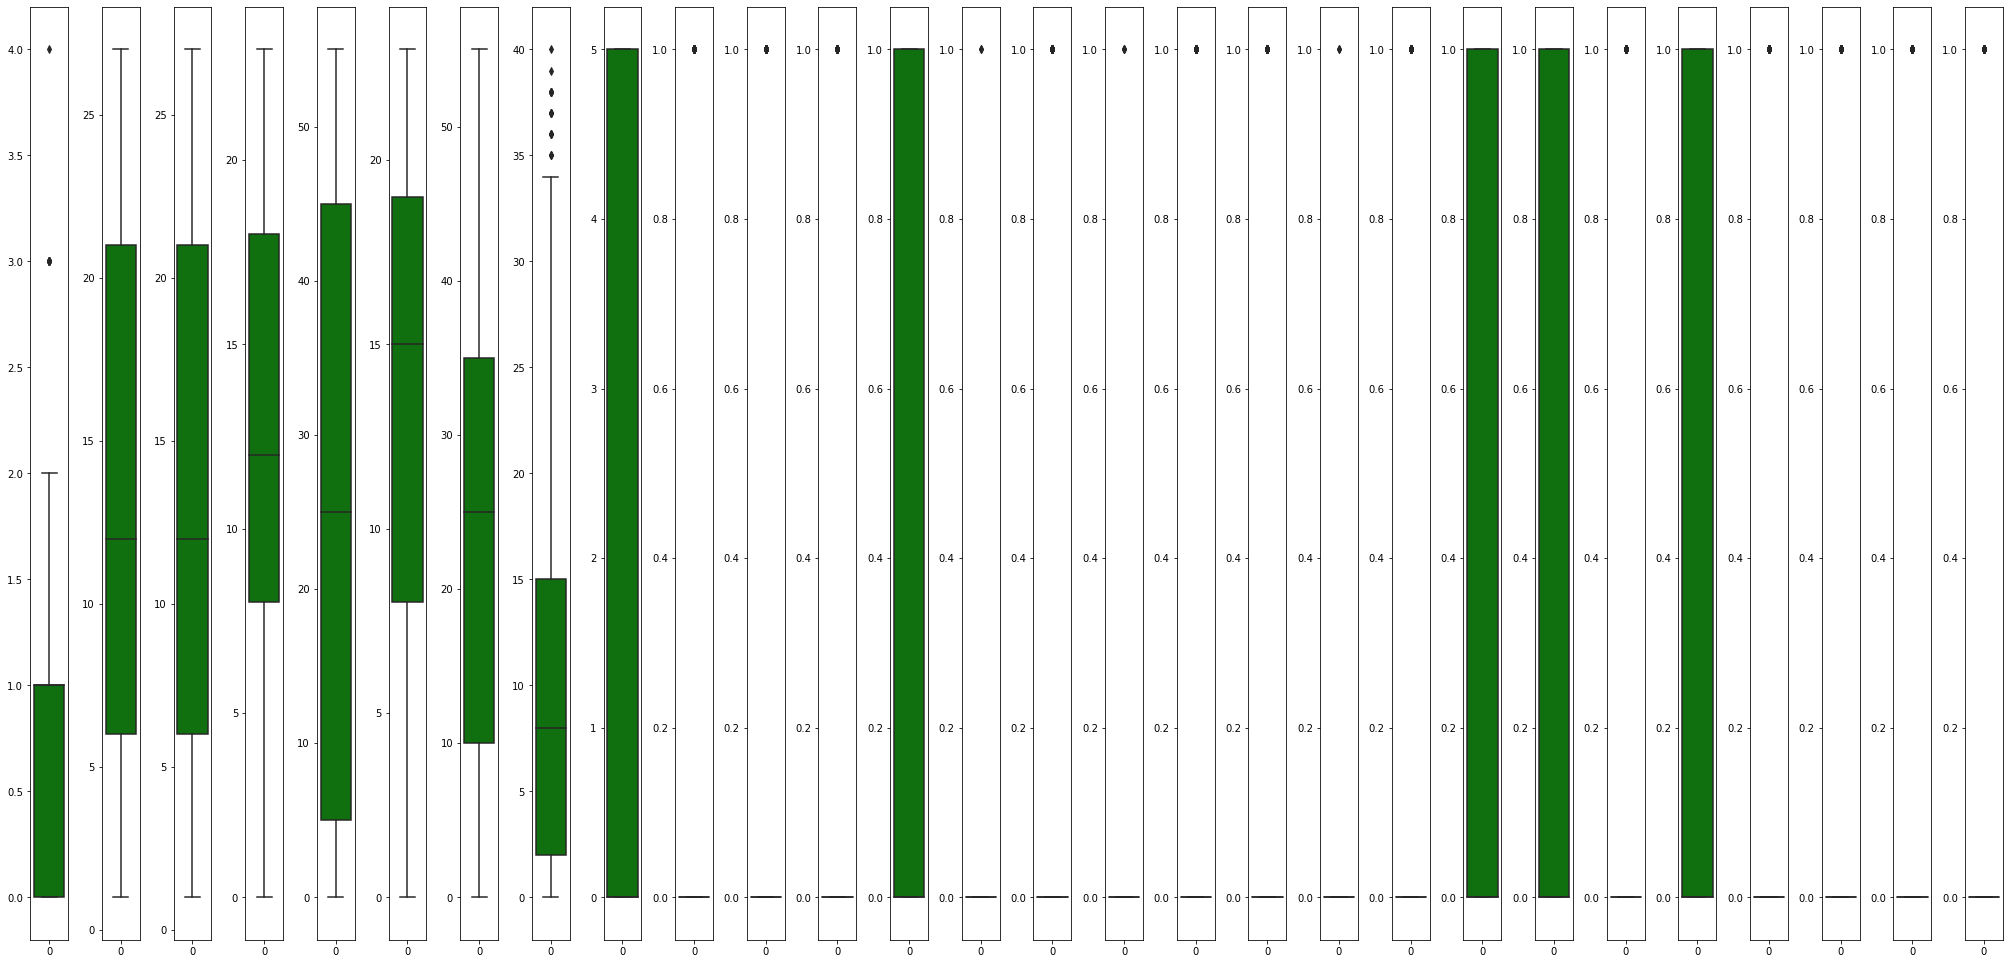

In [145]:
col_list = data_test.columns.values
ncol = 32
nrows = 12
plt.figure(figsize = (ncol,5*ncol))
for i in range (0, len(col_list)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(data = data_test[col_list[i]],color = 'green', orient = 'v')
    plt.tight_layout()

## Removing the outliers through Z - Score Method :

In [185]:
from scipy.stats import zscore
z = np.abs(zscore(data_test))
z.shape


(2671, 28)

In [186]:
threshold = 4
print(np.where(z>4))


(array([  17,   45,   45,   54,   54,   59,   64,   78,   81,   82,   86,
         86,  127,  138,  163,  169,  169,  185,  191,  195,  195,  203,
        203,  209,  223,  223,  247,  272,  274,  279,  283,  293,  295,
        301,  302,  302,  325,  325,  327,  340,  351,  363,  364,  384,
        393,  396,  415,  433,  433,  443,  443,  453,  470,  472,  472,
        494,  494,  495,  495,  504,  504,  534,  541,  541,  580,  589,
        599,  600,  603,  604,  604,  604,  626,  646,  646,  647,  650,
        665,  667,  667,  669,  697,  708,  730,  731,  732,  732,  733,
        733,  739,  739,  764,  764,  767,  773,  779,  783,  792,  795,
        795,  802,  807,  807,  813,  846,  846,  849,  855,  866,  866,
        868,  874,  874,  876,  881,  889,  906,  906,  918,  918,  919,
        932,  932,  942,  942,  957,  964,  970,  985,  993,  993,  995,
        998, 1003, 1018, 1030, 1030, 1044, 1054, 1060, 1065, 1102, 1129,
       1129, 1142, 1159, 1169, 1169, 1177, 1177, 1

In [187]:
data_test_new = data_test[(z<4).all(axis = 1)]
print(data_test.shape)
print(data_test_new.shape)


(2671, 28)
(2419, 28)


In [188]:
data_test_new.columns

Index(['Total_Stops', 'Journey Day', 'Journey Month', 'Dep_hour', 'Dep_min',
       'Arrival_hour', 'Arrival_minutes', 'Duration_hours', 'Duration_mins',
       'Air India', 'GoAir', 'IndiGo', 'Jet Airways', 'Jet Airways Business',
       'Multiple carriers', 'Multiple carriers Premium economy', 'SpiceJet',
       'Vistara', 'Vistara Premium economy', 'Source_Chennai', 'Source_Delhi',
       'Source_Kolkata', 'Source_Mumbai', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata',
       'Destination_New Delhi'],
      dtype='object')

## loss Percentage Calculation :

In [189]:
loss_percent = (2671-2419)/2671*100
print(loss_percent)

9.43466866342194


Observation : here we can see that there is 9.4% loss .

## Separating the independent and dependent variables :

### Train_test_split :

In [190]:
x = data_train_new.drop("Price", axis=1)
y = data_train_new["Price"]

In [191]:
x.head()

,Total_Stops,Journey Day,Journey Month,Dep_hour,Dep_min,Arrival_hour,Arrival_minutes,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,24,3,22,20,1,10,-1.235761,0,-0.467055,0,2.035927,0,0,-0.375985,0,-0.278033,0,0,0,0,0,-0.618709,-0.274325,0,-0.352726,-0.274325,0,3.264316
1,2,1,5,5,50,13,15,-0.155963,5,2.141076,0,-0.491177,0,0,-0.375985,0,-0.278033,0,0,0,0,0,1.616268,-0.274325,0,-0.352726,-0.274325,0,-0.306343
2,2,9,6,9,25,4,25,1.029313,0,-0.467055,0,-0.491177,1,0,-0.375985,0,-0.278033,0,0,0,0,1,-0.618709,-0.274325,1,-0.352726,-0.274325,0,-0.306343
3,1,12,5,18,5,23,30,-0.491557,5,-0.467055,0,2.035927,0,0,-0.375985,0,-0.278033,0,0,0,0,0,1.616268,-0.274325,0,-0.352726,-0.274325,0,-0.306343
4,1,1,3,16,50,21,35,-0.695894,5,-0.467055,0,2.035927,0,0,-0.375985,0,-0.278033,0,0,0,0,0,-0.618709,-0.274325,0,-0.352726,-0.274325,0,3.264316


In [192]:
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

In [193]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [194]:
maxAccu=0
maxRS=0
for i in range(1,100):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state=i)
    mod = LinearRegression()
    mod.fit(x_train, y_train)
    pred = mod.predict(x_test)
    acc=r2_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Maximum r2 score is ",maxAccu," on Random_state ",maxRS)

Maximum r2 score is  0.6355864716246247  on Random_state  86


In [195]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=maxRS)

## Regression Algorithms :

In [196]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn import metrics

### linear Regression :

In [197]:
# Checking r2score for Linear Regression
LR = LinearRegression()
LR.fit(x_train,y_train)

# prediction
predLR=LR.predict(x_test)
print('R2_score:',metrics.r2_score(y_test,predLR))

R2_score: 0.6355864716246247


In [198]:
print(metrics.mean_absolute_error(y_test, predLR))

# Mean Squared Error (MSE)
print(metrics.mean_squared_error(y_test, predLR))

# Root Mean Squared Error (RMSE)
print(np.sqrt(metrics.mean_squared_error(y_test, predLR)))

1876.3916811091854
6275650.681455806
2505.124883405178


## Random Forest Regressor :

In [199]:
#Checking R2 score for Random Forest Regressor:

RFR=RandomForestRegressor()
RFR.fit(x_train,y_train)

# prediction
predRFR=RFR.predict(x_test)
print('R2_Score:',metrics.r2_score(y_test,predRFR))

R2_Score: 0.8223366678780163


In [200]:
# Mean Absolute Error (MAE)
print(metrics.mean_absolute_error(y_test, predRFR))

# Mean Squared Error (MSE)
print(metrics.mean_squared_error(y_test, predRFR))

# Root Mean Squared Error (RMSE)
print(np.sqrt(metrics.mean_squared_error(y_test, predRFR)))

1159.907713315752
3059581.8335057655
1749.1660394330108


## KNN Regressor :

In [201]:
# Checking R2 score for KNN regressor

knn=KNN()
knn.fit(x_train,y_train)

#prediction
predknn=knn.predict(x_test)
print('R2_Score:',metrics.r2_score(y_test,predknn))

R2_Score: 0.6052587466263497


In [202]:
# Mean Absolute Error (MAE)
print(metrics.mean_absolute_error(y_test, predknn))

# Mean Squared Error (MSE)
print(metrics.mean_squared_error(y_test, predknn))

# Root Mean Squared Error (RMSE)
print(np.sqrt(metrics.mean_squared_error(y_test, predknn)))

1844.3443327556326
6797931.53337955
2607.2843215459934


## GradientBoostingRegressor :

In [203]:
gbdt=GradientBoostingRegressor(random_state=0)
gbdt.fit(x_train,y_train)


#prediction
predgbdt=gbdt.predict(x_test)
print('R2_Score:',metrics.r2_score(y_test,predgbdt))

R2_Score: 0.7738610168507883


In [204]:
# Mean Absolute Error (MAE)
print(metrics.mean_absolute_error(y_test, predgbdt))

# Mean Squared Error (MSE)
print(metrics.mean_squared_error(y_test, predgbdt))

# Root Mean Squared Error (RMSE)
print(np.sqrt(metrics.mean_squared_error(y_test, predgbdt)))


1493.1400290965912
3894392.3680083975
1973.4214876727165


## AdaBoostRegressor :

In [205]:
ada=AdaBoostRegressor(random_state=0)
ada.fit(x_train,y_train)

#prediction
predada=ada.predict(x_test)
print('R2_Score:',metrics.r2_score(y_test,predada))

R2_Score: 0.6287698552256631


In [206]:
# Mean Absolute Error (MAE)
print(metrics.mean_absolute_error(y_test, predada))

# Mean Squared Error (MSE)
print(metrics.mean_squared_error(y_test, predada))

# Root Mean Squared Error (RMSE)
print(np.sqrt(metrics.mean_squared_error(y_test, predada)))


2058.2518218850537
6393041.2282340275
2528.446406043448


## Checking the Cross_validation Score :

In [207]:
from sklearn.model_selection import cross_val_score


In [208]:
# Checking cv score for Linear Regression
print(cross_val_score(LR,x,y,cv=5).mean())

0.6148936758164669


In [209]:
# Checking cv score for Random Forest Regression
print(cross_val_score(RFR,x,y,cv=5).mean())

0.813945747805547


In [210]:
# Checking cv score for Gradient Boost Regression
print(cross_val_score(gbdt,x,y,cv=5).mean())

0.7754982342695679


In [211]:
# Checking cv score for KNN Regression
print(cross_val_score(knn,x,y,cv=5).mean())

0.6172711160082242


In [212]:
# Checking cv score for Ada Boost Regressor
print(cross_val_score(ada,x,y,cv=5).mean())

0.6345167026647862


## Regularization :

In [213]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

In [214]:
parameters = {'criterion':['mse', 'mae'],
             'max_features':['auto', 'sqrt', 'log2'],
             'n_estimators':[0,20],
             'max_depth':[2,4,6]}

In [215]:
grid=GridSearchCV(RFR,parameters,scoring='r2',cv=10)

In [216]:
grid_result = grid.fit(x_train,y_train)

In [217]:
grid_result.best_params_

{'criterion': 'mse',
 'max_depth': 6,
 'max_features': 'auto',
 'n_estimators': 20}

In [218]:
grid_result.score(x_train,y_train)

0.7740655118321095

In [219]:
y_preds_RFR=grid_result.predict(x_test)
rmse_RFR=np.sqrt(mean_squared_error(y_preds_RFR,y_test))
print('RMSE for RandomFOrest Regression :{0:.2f}'.format(rmse_RFR))

RMSE for RandomFOrest Regression :2038.43


In [220]:
RandomForest = RandomForestRegressor(criterion = 'mse', max_features = 'auto', max_depth = 6 , n_estimators = 20 )
RandomForest.fit(x_train,y_train)
RandomForest.score(x_train,y_train)

pred_decision = RandomForest.predict(x_test)
RandomForestS = r2_score(y_test,pred_decision)
print('R2 Score:', RandomForestS*100)

RandomForestScore = cross_val_score(RandomForest,x,y,cv = 5)
RandomForestC = RandomForestScore.mean()
print("Cross Val Score:",RandomForestC*100)

R2 Score: 75.31808927965622
Cross Val Score: 76.18230277026267


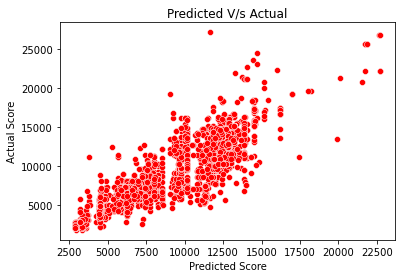

In [221]:
sns.scatterplot(x = pred_decision, y = y_test, color = 'red')
plt.xlabel('Predicted Score')
plt.ylabel('Actual Score')
plt.title('Predicted V/s Actual')
plt.show()

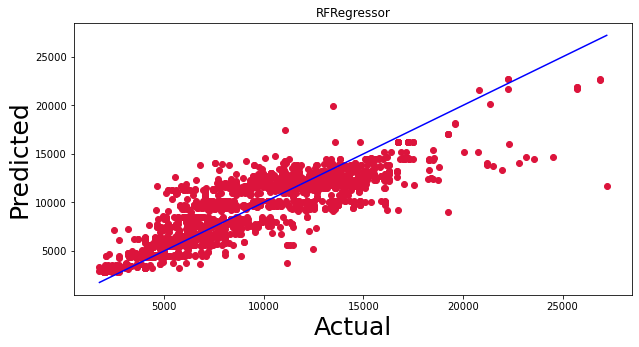

In [222]:
plt.figure(figsize=(10,5))
plt.scatter(y_test, pred_decision, c='crimson')
p1 = max(max(pred_decision), max(y_test))
p2 = min(min(pred_decision), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Actual', fontsize=25)
plt.ylabel('Predicted', fontsize=25)
plt.title("RFRegressor")
plt.show()

## Saving the model :

In [226]:
import pickle
filename = 'churn.pkl'
pickle.dump(RandomForest,open(filename, 'wb'))

In [227]:
loaded_model = pickle.load(open("churn.pkl", "rb"))
result = loaded_model.score(x_test, y_test)
print(result)

0.7531808927965622


In [228]:
conclusion = pd.DataFrame([loaded_model.predict(x_test)[:],pred_decision[:]],index = ["Predicted","Original"])

In [229]:
conclusion

0            1             2            3             4     \
Predicted  4496.255827  4402.209185  12998.227289  6732.471886  12812.307447   
Original   4496.255827  4402.209185  12998.227289  6732.471886  12812.307447   

                  5            6           7            8            9     \
Predicted  4593.648632  4402.209185  5383.18987  8491.426793  4472.338961   
Original   4593.648632  4402.209185  5383.18987  8491.426793  4472.338961   

                  10            11            12           13           14    \
Predicted  3255.482064  12633.370534  10038.937436  6732.471886  6272.645247   
Original   3255.482064  12633.370534  10038.937436  6732.471886  6272.645247   

                  15            16            17           18            19    \
Predicted  5630.134759  12421.896662  11448.686957  5630.134759  11752.963793   
Original   5630.134759  12421.896662  11448.686957  5630.134759  11752.963793   

                  20            21           22            23            24    \
Predicted  5504.107835  12505.590326  9738.580575  13866.535592  11936.997876   
Original   5504.107835  12505.590326  9738.580575  13866.535592  11936.997876   

                   25           26            27           28           29    \
Predicted  10038.937436  5579.181929  12666.091849  5644.790353  11881.10416   
Original   10038.937436  5579.181929  12666.091849  5644.790353  11881.10416   

                  30            31           32            33            34    \
Predicted  8046.686633  14513.884492  9323.795262  10038.937436  11843.466521   
Original   8046.686633  14513.884492  9323.795262  10038.937436  11843.466521   

                   35           36           37           38            39    \
Predicted  11971.879003  4534.020004  4508.493129  8000.949977  12919.472801   
Original   11971.879003  4534.020004  4508.493129  8000.949977  12919.472801   

                  40            41           42           43           44    \
Predicted  7448.343506  12505.590326  7448.343506  6210.488223  5582.485287   
Original   7448.343506  12505.590326  7448.343506  6210.488223  5582.485287   

                   45            46            47            48    \
Predicted  11831.589848  13854.459104  11550.540493  12812.307447   
Original   11831.589848  13854.459104  11550.540493  12812.307447   

                  49           50            51           52            53    \
Predicted  4417.025825  8000.949977  14513.884492  4561.318968  11831.589848   
Original   4417.025825  8000.949977  14513.884492  4561.318968  11831.589848   

                   54           55            56           57           58    \
Predicted  14064.203445  4561.318968  12797.859339  10457.94183  5423.257872   
Original   14064.203445  4561.318968  12797.859339  10457.94183  5423.257872   

                  59           60           61           62           63    \
Predicted  13136.24219  7738.324808  9323.795262  5630.134759  3311.678888   
Original   13136.24219  7738.324808  9323.795262  5630.134759  3311.678888   

                   64            65           66            67           68    \
Predicted  12704.470068  11817.135476  8000.949977  12512.851127  8491.426793   
Original   12704.470068  11817.135476  8000.949977  12512.851127  8491.426793   

                   69           70            71           72           73    \
Predicted  10153.084132  4402.209185  11362.605062  8000.949977  4508.493129   
Original   10153.084132  4402.209185  11362.605062  8000.949977  4508.493129   

                  74         75           76         77           78    \
Predicted  7738.324808  9766.0435  11919.61659  9766.0435  8290.931278   
Original   7738.324808  9766.0435  11919.61659  9766.0435  8290.931278   

                  79           80            81           82            83    \
Predicted  5769.939088  9914.138264  11647.136086  7143.297453  10981.857958   
Original   5769.939088  9914.138264  11647.136086  7143.297